## Credit Card Fraud Detection

In this project you will predict fraudulent credit card transactions with the help of Machine learning models. Please import the following libraries to get started.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing

## Exploratory data analysis

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [3]:
!unzip gdrive/MyDrive/UpGrad/archive.zip

Archive:  gdrive/MyDrive/UpGrad/archive.zip
  inflating: creditcard.csv          


In [4]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
#observe the different feature type present in the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28


*   All the varianles are of float type as data is PCA data.
*   There are no missing values in aur data.



In [ ]:
#check for numerical properties os variables
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
#check for number of fraud and non fraud cases
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

Here we will observe the distribution of our classes

In [ ]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


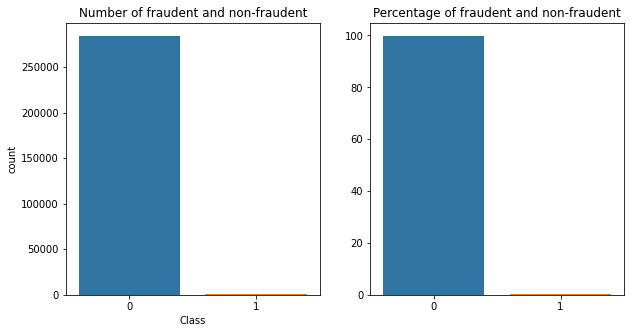

In [ ]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(df.Class)
plt.title('Number of fraudent and non-fraudent')
plt.subplot(1,2,2)
sns.barplot(x=[0,1],y=[normal_share,fraud_share])
plt.title('Percentage of fraudent and non-fraudent')
plt.show()

*   There is huge data imbalance in our data.
*   More than 99% of data belongs to non-fraud class.

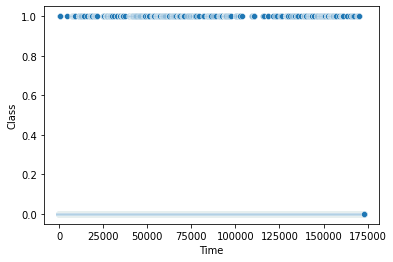

In [ ]:
# Create a scatter plot to observe the distribution of classes with time
sns.scatterplot(x=df.Time,y=df.Class)
plt.show()

*  Time gap between 2 transactions in fraud cases is small as compared to non-fraudent cases.

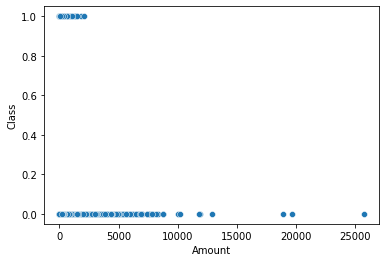

In [ ]:
# Create a scatter plot to observe the distribution of classes with Amount
sns.scatterplot(x=df.Amount,y=df.Class)
plt.show()

*  The amount of transaction in fraud cases lies around 0-3000.
*  The amount of transaction in non-fraud cases is spread over range of 0-25000.

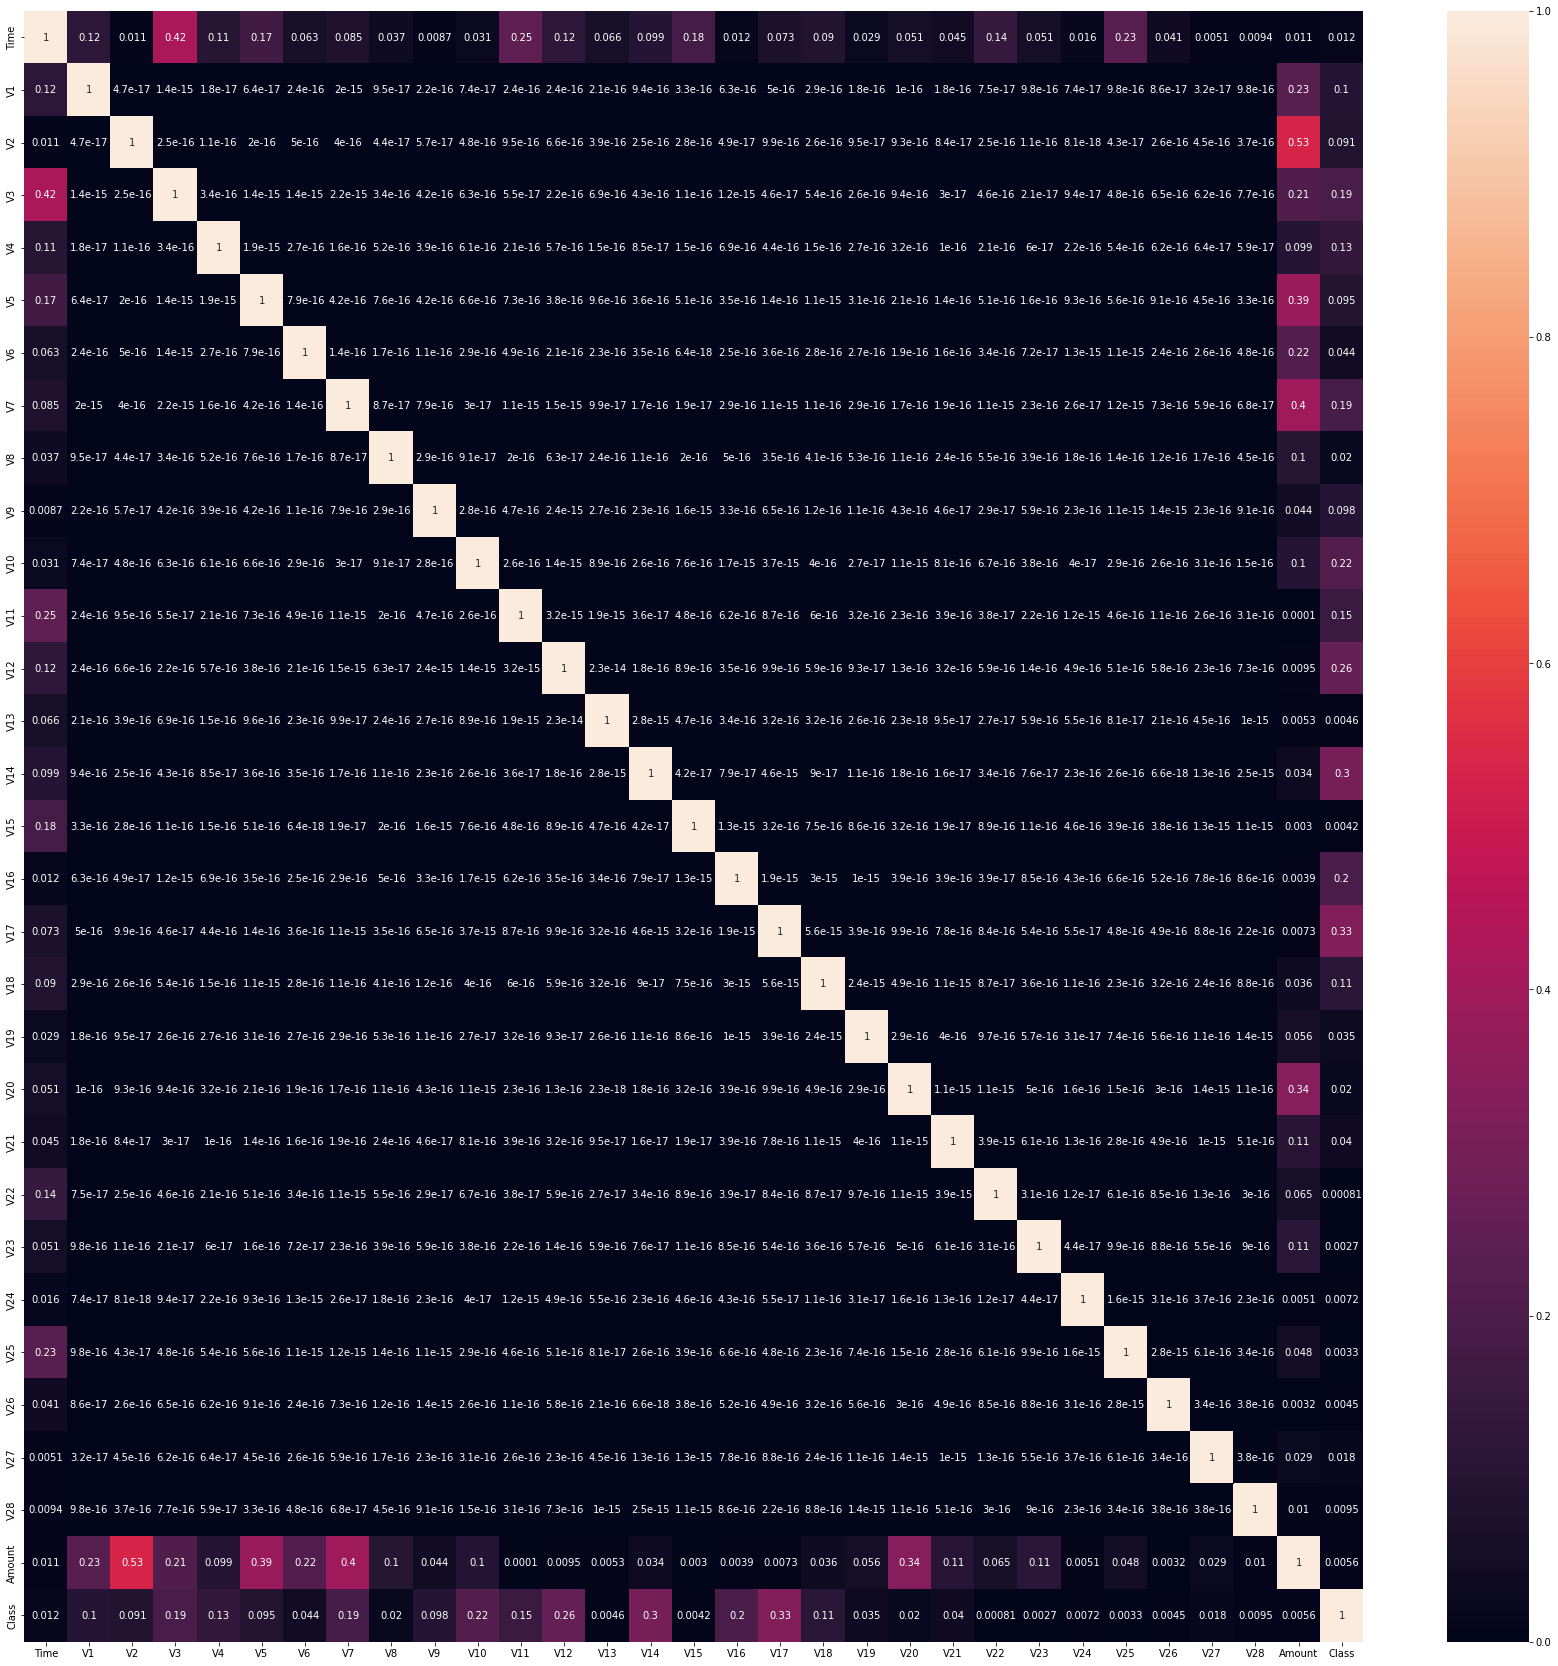

In [ ]:
# check correlation of variables.
plt.figure(figsize=(30,30))
sns.heatmap(df.corr().abs(),annot=True)
plt.show()

*  There is no high correlation between between any variable.
*  Max correlation between variables is 0.53, which is acceptable value.
*  Hence we are not dropping and columns.

### Splitting the data into train & test data

In [5]:
y=df.Class #class variable
X=df.drop('Class',axis=1)

In [6]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,train_size=0.7,random_state=50)

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [ ]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
345
147


*  **As random state of 50 have almost split fraud cases in required 70-30 ratio, we will proceed with above train_test split.**

### Plotting the distribution of a variable

In [ ]:
# plot the histogram of a variable from the dataset to see the skewness
Columns=X_train.columns
Columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


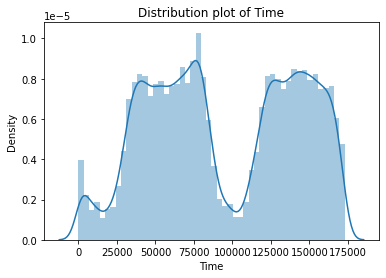

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


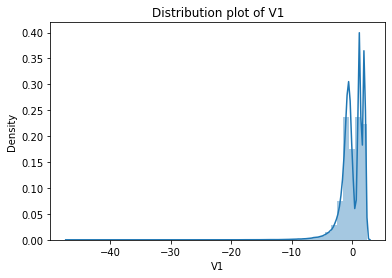

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


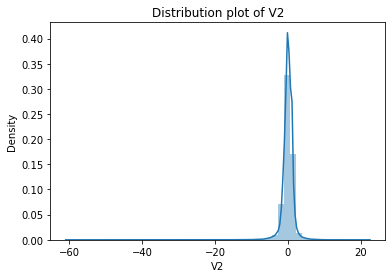

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


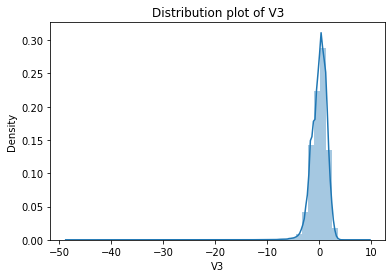

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


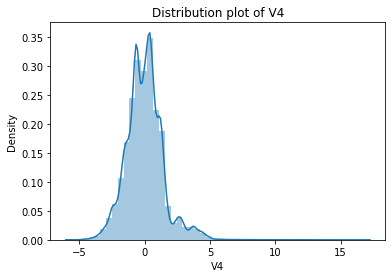

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


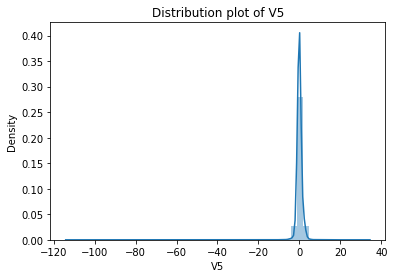

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


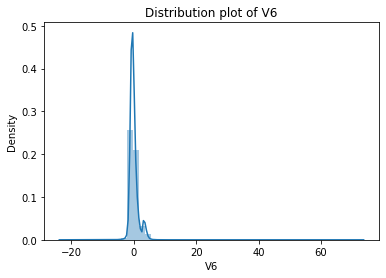

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


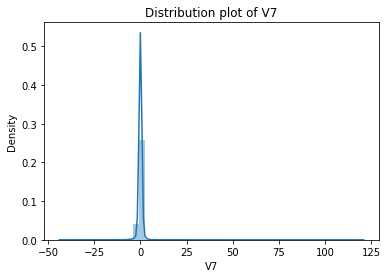

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


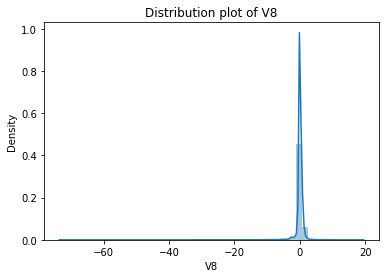

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


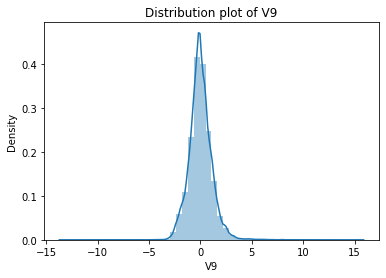

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


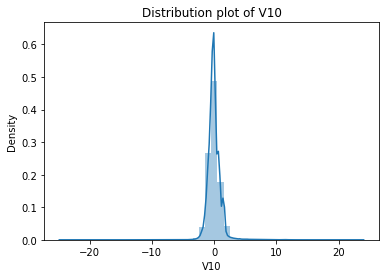

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


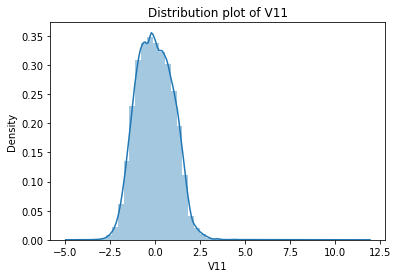

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


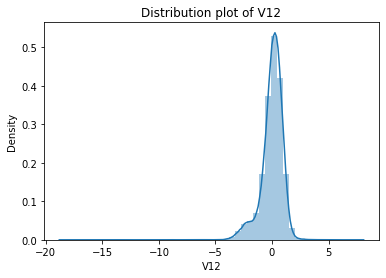

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


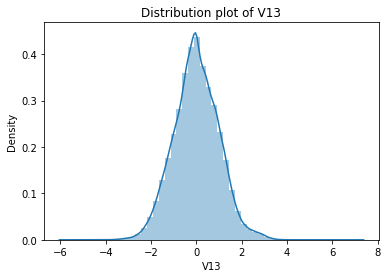

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


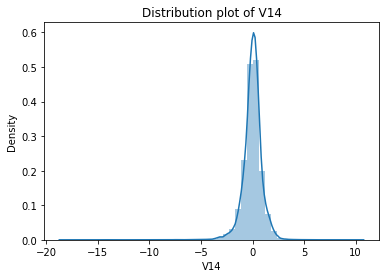

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


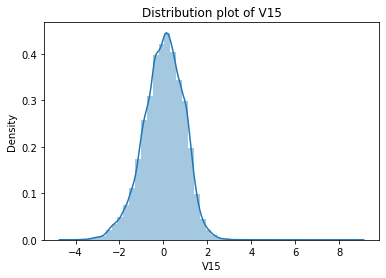

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


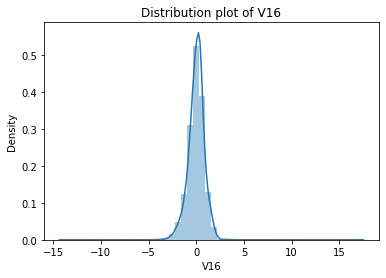

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


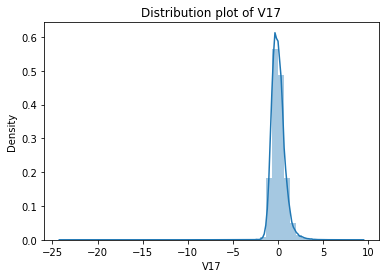

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


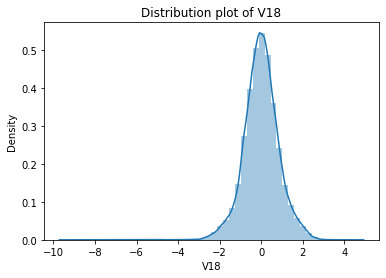

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


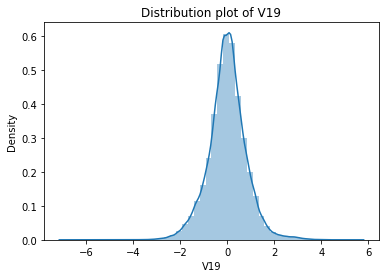

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


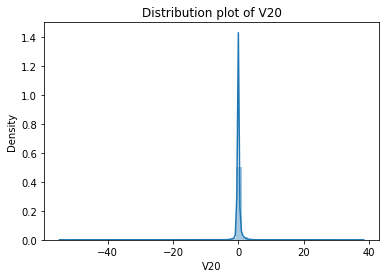

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


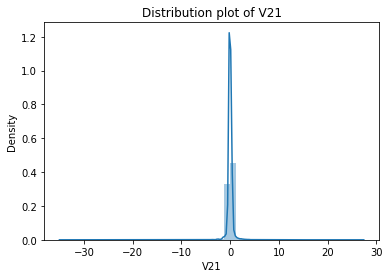

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


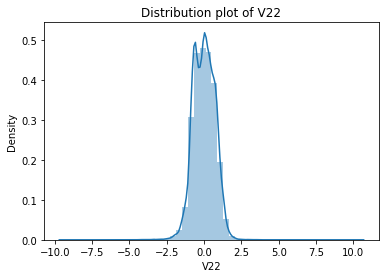

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


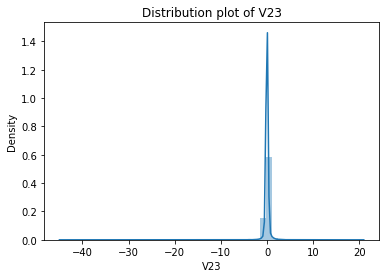

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


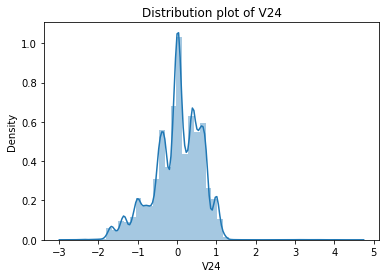

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


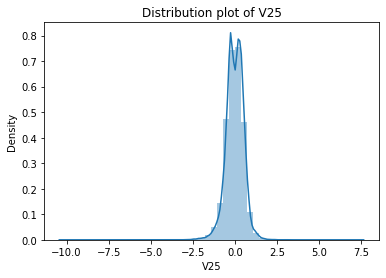

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


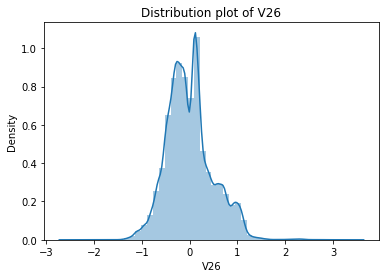

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


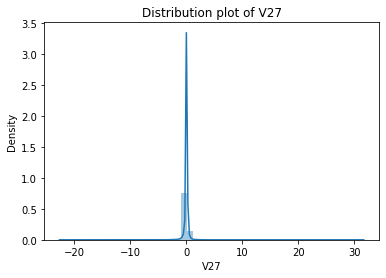

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


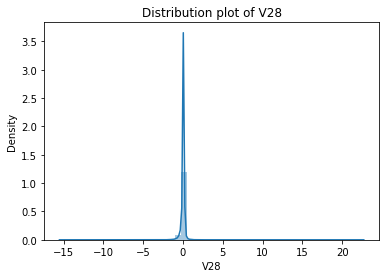

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


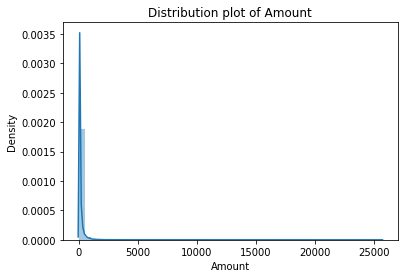

In [ ]:
for col in Columns:
    sns.distplot(X_train[col])
    plt.title('Distribution plot of '+col)
    plt.show()

*  Most of the variables are skewed, we will perform power transformation to tackle skewness.
*  We will try to achieve skewness in range +/-3.0.

### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [ ]:
X_train.skew()

Time      -0.037472
V1        -3.232042
V2        -4.166468
V3        -2.213286
V4         0.667670
V5        -3.106165
V6         2.015220
V7         3.374112
V8        -9.071348
V9         0.542411
V10        1.022971
V11        0.322374
V12       -2.226997
V13        0.066740
V14       -1.869736
V15       -0.309998
V16       -1.084434
V17       -3.825590
V18       -0.265658
V19        0.114607
V20       -3.674927
V21        2.718787
V22       -0.170056
V23       -6.103916
V24       -0.541512
V25       -0.392609
V26        0.584311
V27       -0.229173
V28        6.583780
Amount    16.841713
dtype: float64

*  Before transformation there are few variables which are having skewness from +/-3 to +/- 16.

In [7]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
pt = preprocessing.PowerTransformer(method='yeo-johnson', standardize=True)
X_train=pt.fit_transform(X_train)

In [8]:
from pandas import DataFrame
X_train=DataFrame(X_train)
X_train.columns=X.columns
X_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-0.086499,-0.517874,0.492521,-0.930496,-2.073485,0.476854,-0.852026,1.906870,-0.548645,0.295091,-0.871293,-0.997631,0.152051,0.123587,0.189597,-1.266298,-0.652046,-0.710171,-1.013352,-1.075400,0.003325,0.229604,1.108164,-0.151643,1.391888,-0.448910,1.068148,1.259881,0.890483,1.157419
1,-1.450680,-1.135875,1.643082,-0.456802,-0.079237,-0.222370,-0.510611,-0.041167,0.917153,-0.769001,-0.365074,-1.510478,0.573869,1.260758,0.898203,0.426614,0.359162,-0.225657,-0.113790,0.437596,-0.281682,0.257521,-0.006207,-0.214735,-0.731567,0.190067,0.694480,-1.838860,-0.041553,-1.480484
2,1.084636,1.025685,-0.749929,0.120124,1.149721,-0.617823,1.232409,-1.021512,0.383373,1.925278,-0.239936,-2.460311,1.494223,1.279407,-1.524409,-1.633134,-0.166398,-0.447101,0.281525,0.040291,0.152861,0.239442,1.087124,-0.114633,-0.032969,-0.104952,-1.021902,0.274204,0.033525,1.101077
3,-0.267516,-0.133828,-1.516520,0.082693,-0.020798,-1.496591,-0.326071,-0.165518,-0.301751,-0.414524,0.331410,-0.233398,-0.687196,0.602707,-0.437105,1.333745,2.002000,0.044390,-0.902381,0.044880,1.775631,1.024569,1.041540,-1.032552,0.754420,0.374754,-0.153939,-0.196595,0.419598,1.883163
4,-0.773653,-1.097079,-0.959027,1.072813,0.397609,1.592351,-1.302793,-0.729427,0.187361,-0.678304,-0.010457,1.530412,0.935269,0.145165,0.646118,1.074648,-0.640559,0.165607,-0.248890,1.422843,0.925715,0.296304,-0.111169,0.595725,0.006186,-0.692634,1.542413,-0.060742,0.461376,-0.016590


In [ ]:
X_train.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,1.993640e+05,1.993640e+05,1.993640e+05,1.993640e+05,1.993640e+05,1.993640e+05,1.993640e+05,1.993640e+05,1.993640e+05,1.993640e+05,1.993640e+05,1.993640e+05,1.993640e+05,1.993640e+05,1.993640e+05,1.993640e+05,1.993640e+05,1.993640e+05,1.993640e+05,1.993640e+05,1.993640e+05,1.993640e+05,1.993640e+05,1.993640e+05,1.993640e+05,1.993640e+05,1.993640e+05,1.993640e+05,1.993640e+05,1.993640e+05
mean,2.839928e-16,-1.628268e-17,4.065304e-17,-1.254238e-17,-6.581013e-17,-1.280565e-17,1.583857e-17,8.319231e-18,1.296025e-17,2.896415e-17,-1.391315e-17,-3.901518e-17,-3.033895e-18,-2.903028e-18,1.344481e-17,-3.206919e-17,1.905512e-17,8.410525e-18,8.786490e-18,-2.262112e-17,1.786270e-17,1.297884e-18,-2.866079e-17,-1.872416e-17,3.198732e-18,1.525134e-17,1.183486e-17,4.220681e-18,-5.695515e-19,3.753717e-16
std,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00
min,-2.433973e+00,-7.625935e+00,-2.066243e+01,-1.305941e+01,-5.012759e+00,-7.180461e+01,-3.667135e+01,-3.495576e+01,-2.711950e+01,-1.619518e+01,-3.073760e+01,-5.256393e+00,-7.283434e+00,-6.041300e+00,-1.204574e+01,-4.165193e+00,-1.034345e+01,-2.089968e+01,-1.016892e+01,-8.963623e+00,-6.189238e+01,-5.961654e+01,-1.188366e+01,-5.884375e+01,-3.554817e+00,-1.469780e+01,-8.040489e+00,-4.750868e+01,-5.628636e+01,-2.011425e+00
25%,-8.100083e-01,-7.225417e-01,-4.532403e-01,-7.128462e-01,-5.694062e-01,-5.074260e-01,-5.557460e-01,-4.408758e-01,-2.794941e-01,-5.599059e-01,-4.744924e-01,-7.347176e-01,-5.865081e-01,-6.469849e-01,-5.167724e-01,-6.687794e-01,-5.970215e-01,-6.043259e-01,-6.094022e-01,-5.558929e-01,-2.826177e-01,-3.017739e-01,-7.532874e-01,-2.740280e-01,-6.575772e-01,-6.364893e-01,-6.497530e-01,-1.845358e-01,-1.563357e-01,-7.574949e-01
50%,-1.431128e-01,-2.495787e-01,-3.930031e-02,-2.576240e-02,6.249578e-02,-5.323276e-02,-1.147583e-01,3.364440e-02,-5.820759e-02,5.494752e-03,-4.803938e-02,1.246051e-02,-1.643488e-02,-3.120741e-03,-2.159302e-02,-3.567564e-03,5.066799e-04,-1.186954e-01,-2.527498e-02,1.698014e-02,-8.947033e-02,-2.544763e-02,-8.754264e-03,-3.001748e-02,-2.736465e-02,-7.180191e-03,-1.637989e-02,-6.615799e-03,4.458101e-02,2.830622e-02
75%,9.277753e-01,7.355095e-01,4.763842e-01,6.737088e-01,5.820502e-01,4.323596e-01,4.100989e-01,4.582355e-01,2.556720e-01,5.808073e-01,4.512423e-01,7.454457e-01,6.090992e-01,6.707646e-01,4.866603e-01,6.895042e-01,5.708719e-01,4.570955e-01,5.870764e-01,5.700754e-01,1.655940e-01,2.706588e-01,7.216688e-01,2.295345e-01,7.060983e-01,6.610255e-01,5.788594e-01,2.154234e-01,2.529146e-01,7.483739e-01
max,1.535697e+00,1.858031e+00,2.329899e+01,1.140707e+01,8.547628e+00,2.714063e+01,2.329146e+01,9.617234e+01,3.683506e+01,1.080358e+01,1.664735e+01,9.335276e+00,1.956830e+01,6.883317e+00,1.748829e+01,1.281817e+01,3.484865e+01,1.403606e+01,6.069440e+00,6.591734e+00,5.649392e+01,3.083977e+01,1.608885e+01,4.016133e+01,1.219409e+01,1.913546e+01,4.920194e+00,9.401259e+01,5.924972e+01,3.677184e+00


In [ ]:
X_train.skew()

Time     -0.230331
V1       -0.217863
V2        0.366173
V3       -0.077872
V4        0.017622
V5       -1.440542
V6       -1.898451
V7        3.292512
V8        2.137758
V9       -0.060970
V10      -1.413694
V11       0.054119
V12       0.166520
V13       0.006118
V14       0.115459
V15       0.014764
V16       0.174486
V17      -0.820263
V18      -0.062152
V19       0.016621
V20      -1.080840
V21      -1.929777
V22      -0.013956
V23      -0.499095
V24       0.122820
V25       0.076856
V26      -0.022908
V27       3.335360
V28       1.230065
Amount    0.018358
dtype: float64

* As we can observe almost all the variables except 2 have reduced skewness significantly belove 3.
* Only 2 variables are having skewness 3.2 and 3.3.
* We wll proceed with this data for model building.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


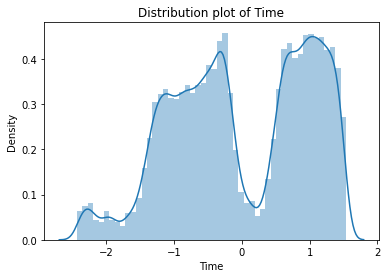

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


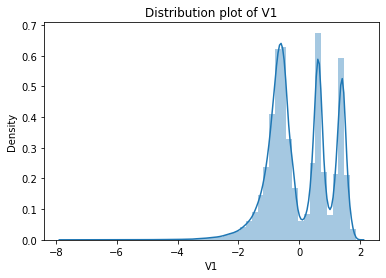

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


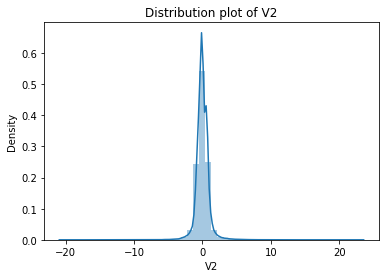

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


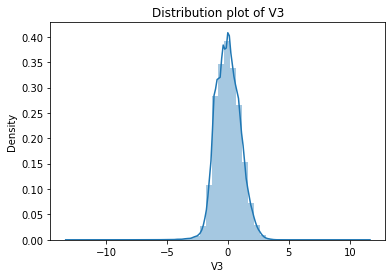

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


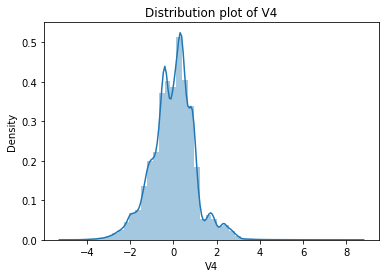

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


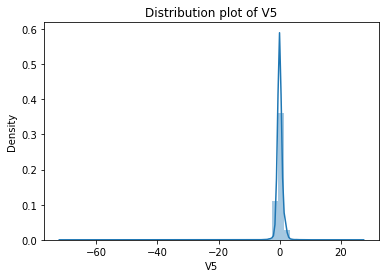

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


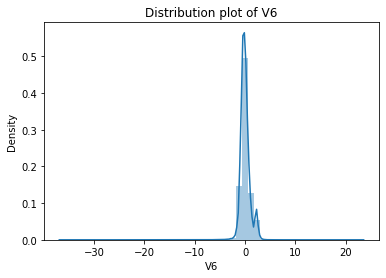

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


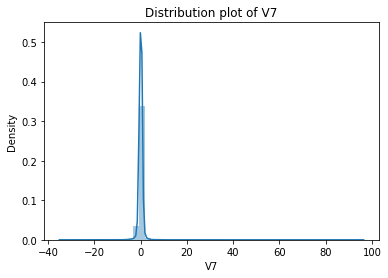

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


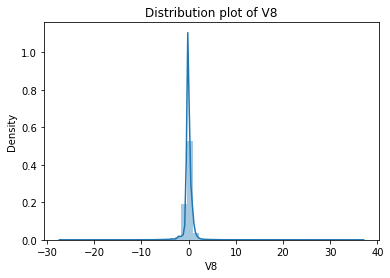

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


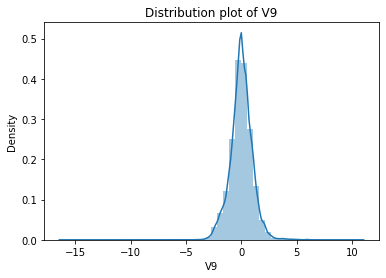

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


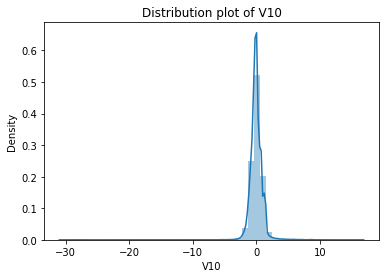

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


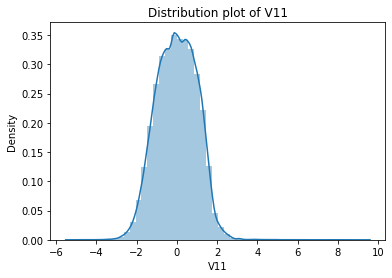

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


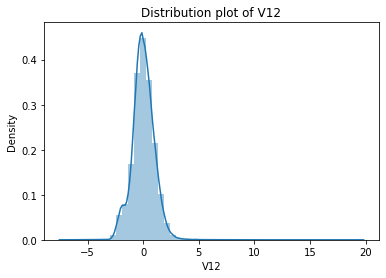

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


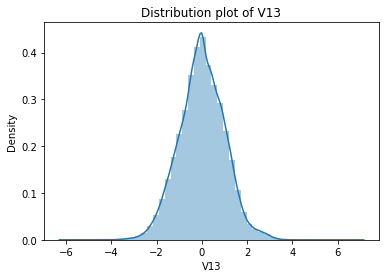

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


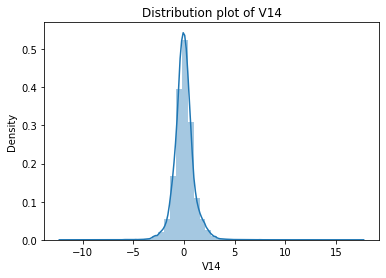

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


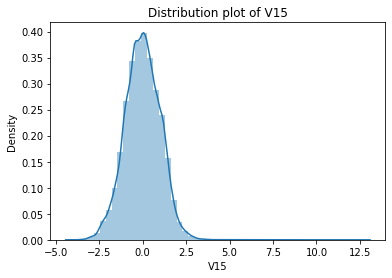

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


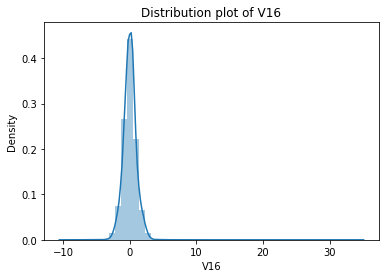

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


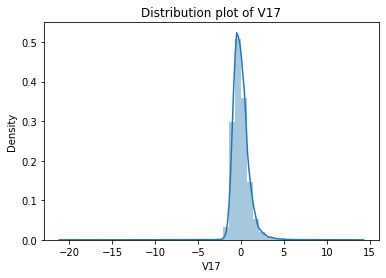

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


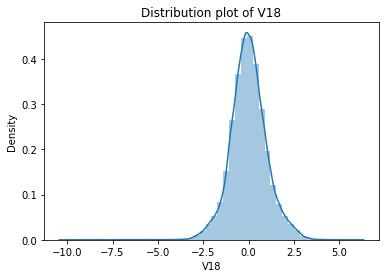

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


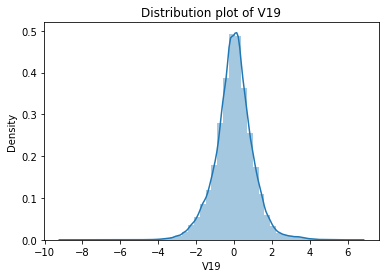

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


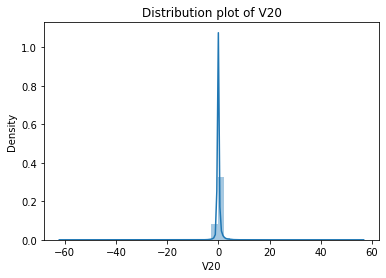

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


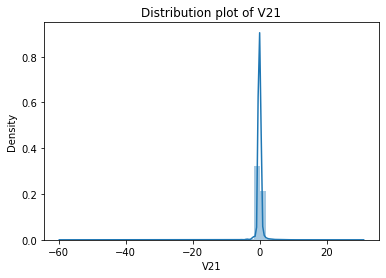

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


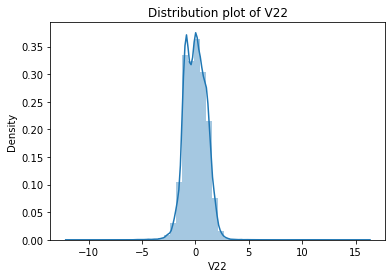

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


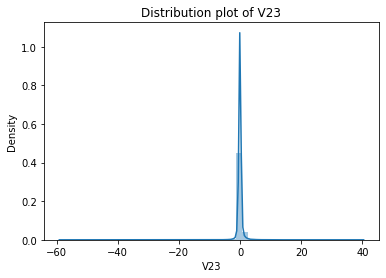

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


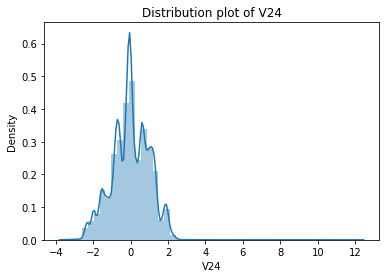

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


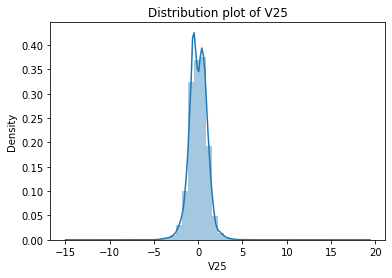

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


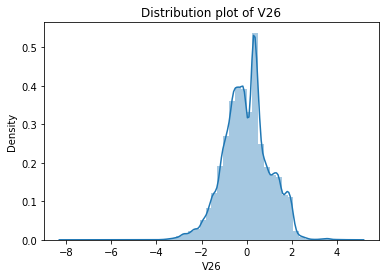

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


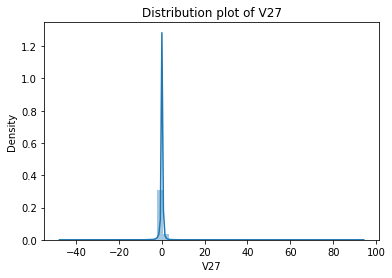

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


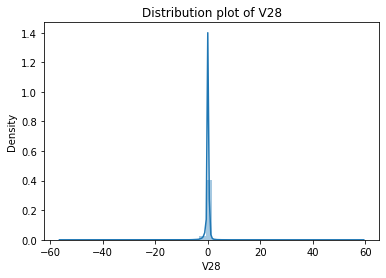

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


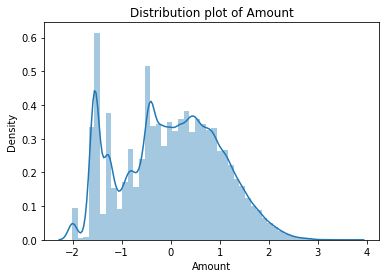

In [ ]:
# plot the histogram of a variable from the dataset again to see the result 
Columns=X_train.columns
for i in Columns:
    sns.distplot(X_train[i])
    plt.title('Distribution plot of '+i)
    plt.show()

In [9]:
# similarly do transformation on X_test to remove skewness
X_test=pt.fit_transform(X_test)

In [10]:
X_test=DataFrame(X_test)
X_test.columns=X.columns
X_test.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.139321,-1.096431,0.647296,-0.298936,0.471289,0.156999,-1.785032,0.066406,0.438286,-0.777045,-1.143948,-0.030643,-0.134711,-0.061463,-0.601217,0.677916,0.545831,1.546305,0.332838,-0.285613,-0.596259,0.112228,0.026762,0.321408,1.098427,-0.571454,0.557177,-0.770179,-0.054173,-1.627042
1,-1.951215,0.412495,-0.500865,0.190139,0.452312,-0.711172,-0.479207,-0.121907,-0.252387,1.888189,-0.723583,0.096490,-2.107945,0.477144,1.756622,-0.978736,-0.438236,1.208759,-0.332425,0.265759,0.185754,-0.227378,-0.641110,-0.302828,0.623462,0.591170,1.957908,-0.374261,0.078134,1.205044
2,-0.507174,-0.550408,-0.247392,1.957377,-0.584025,-0.462704,1.349657,-0.773675,0.173174,0.654813,1.270307,-0.230228,-0.793634,-0.696120,-1.654295,-1.325593,0.071871,0.794706,-0.764797,2.933714,0.705849,0.164177,1.506938,-0.631898,-1.643843,-0.559118,0.201912,-0.053540,-0.597872,-1.540296
3,-0.381699,-0.008320,-0.968533,1.296431,1.265381,-1.038185,1.451501,-0.932784,0.698438,1.396673,-0.386825,0.645695,2.256219,-0.261264,-0.966095,-1.665654,-0.880071,0.651940,-0.367435,-0.603458,0.485442,0.533555,1.354294,-0.588095,-0.450322,0.543048,-0.096549,0.225369,0.245152,1.495248
4,-1.231479,-0.710206,0.350005,0.979557,-0.299039,0.562689,-0.120236,1.503479,-0.350539,-0.625155,-0.694647,0.679034,1.285432,0.630386,-0.270998,-2.021395,0.346026,-1.469048,0.026690,-1.602535,0.148655,0.179806,0.403489,-0.333753,-0.070360,1.268768,-1.370939,-0.428575,-0.400228,0.988757


## Model Building
- Build different models on the imbalanced dataset and see the result

## Logistic Regression

In [ ]:

from sklearn import linear_model #import the package
from sklearn.linear_model import LogisticRegression
num_C = [1.0,1.5,2.0,2.5,3.0]  #--> list of values

cv_num = 5  #--> list of values

#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv 
- y_train_cv
- y_test_cv 

In [11]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [ ]:
logreg=LogisticRegression()
result = cross_val_score(logreg, X=X_train, y=y_train, cv=cv_num, scoring='roc_auc')
print(result.mean())

0.9764549249825928


In [ ]:
#perform cross validation
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=50)


In [ ]:

logreg=LogisticRegression()
result = cross_val_score(logreg, X=X_train, y=y_train, cv=kfold, scoring='roc_auc')
print(result.mean())

0.9771958410356282


### Hyperparameter Tuning

In [ ]:
logreg

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
#Set-1
num_C = [1.0,1.5,2.0,2.5,3.0]
dual=[True,False]
max_iter=[100,110,120,130,140]
param_grid = dict(C=num_C,dual=dual,max_iter=max_iter)

In [ ]:
import time

logreg = LogisticRegression(penalty='l2')
grid = GridSearchCV(estimator=logreg, param_grid=param_grid, cv = kfold,verbose=1, n_jobs=-1,scoring='roc_auc')

start_time = time.time()
grid_result = grid.fit(X_train, y_train)
# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  62 tasks      | elapsed:   24.2s
[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  2.0min finished


Best: 0.977196 using {'C': 1.0, 'dual': False, 'max_iter': 100}
Execution time: 121.59593367576599 ms


In [ ]:
#Set-2
num_C = [0.001,0.01,0.5,0.8,1.0]
dual=[True,False]
max_iter=[50,60,70,80,90,100]
param_grid = dict(C=num_C,dual=dual,max_iter=max_iter)

In [ ]:
lr = LogisticRegression(penalty='l2')
grid = GridSearchCV(estimator=lr, param_grid=param_grid, cv = kfold,verbose=1, n_jobs=-1,scoring='roc_auc')

start_time = time.time()
grid_result = grid.fit(X_train, y_train)
# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  86 tasks      | elapsed:   14.2s
[Parallel(n_jobs=-1)]: Done 294 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.9min finished


Best: 0.978746 using {'C': 0.01, 'dual': False, 'max_iter': 50}
Execution time: 117.1313066482544 ms


In [ ]:
#Set-3
num_C = [0.001,0.005,0.01,0.15,0.5]
dual=[True,False]
max_iter=[30,40,50,60]
param_grid = dict(C=num_C,dual=dual,max_iter=max_iter)

In [ ]:
lr = LogisticRegression(penalty='l2')
grid = GridSearchCV(estimator=lr, param_grid=param_grid, cv = kfold,verbose=1, n_jobs=-1,scoring='roc_auc')

start_time = time.time()
grid_result = grid.fit(X_train, y_train)
# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  84 tasks      | elapsed:   19.5s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  1.1min finished


Best: 0.978746 using {'C': 0.01, 'dual': False, 'max_iter': 30}
Execution time: 66.26800036430359 ms


### Similarly explore other algorithms by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

## Decision Trees

In [12]:

from sklearn.metrics import classification_report,roc_auc_score

In [13]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#Default run
dt_base = DecisionTreeClassifier(random_state=42, max_depth=4)

#Training the model.
model=dt_base.fit(X_train, y_train)
#Predict test data set.
y_pred = model.predict(X_test)
#Checking performance our model with classification report.
print(classification_report(y_test, y_pred))
#Checking performance our model with ROC Score.
roc_auc_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.78      0.80      0.79       147

    accuracy                           1.00     85443
   macro avg       0.89      0.90      0.89     85443
weighted avg       1.00      1.00      1.00     85443



0.8977657396667164

In [ ]:
# Hyper-parameter tuning for the Decision Tree
# Set-1
dt = DecisionTreeClassifier(random_state=42)
params = {
    "max_depth": [2,3,5,10,20],
    "min_samples_leaf": [5,10,20,50,80,100]
}


In [ ]:
grid_search = GridSearchCV(estimator=dt,
                           param_grid=params,
                           cv=4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [ ]:

grid = GridSearchCV(estimator=dt, param_grid=params, cv = kfold,verbose=1, n_jobs=-1,scoring='roc_auc')
start_time = time.time()
best_model = grid.fit(X_train,y_train)

print('Best max_depth:', best_model.best_estimator_.get_params()['max_depth'])
print('Best min_samples_leaf:', best_model.best_estimator_.get_params()['min_samples_leaf'])
print("Best score using above parameters: " ,best_model.best_score_)
print("Execution time: " + str((time.time() - start_time)) + ' ms')

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 10.7min finished


Best max_depth: 10
Best min_samples_leaf: 20
Best score using above parameters:  0.9458929420445259
Execution time: 653.7948849201202 ms


In [ ]:
print("Best score using above parameters: " , best_model.best_score_)

Best score using above parameters:  0.9458929420445259


In [ ]:
#Set-2
dt = DecisionTreeClassifier(random_state=42)
params = {
    "max_depth": [8,9,10,11,12],
    "min_samples_leaf": [15,20,25,30]
}


In [ ]:

grid = GridSearchCV(estimator=dt, param_grid=params, cv = kfold,verbose=1, n_jobs=-1,scoring='roc_auc')
start_time = time.time()
best_model = grid.fit(X_train,y_train)

print('Best max_depth:', best_model.best_estimator_.get_params()['max_depth'])
print('Best min_samples_leaf:', best_model.best_estimator_.get_params()['min_samples_leaf'])
print("Best score using above parameters: " ,best_model.best_score_)
print("Execution time: " + str((time.time() - start_time)) + ' ms')

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 11.1min finished


Best max_depth: 8
Best min_samples_leaf: 20
Best score using above parameters:  0.946794018720021
Execution time: 675.1712493896484 ms


In [ ]:
#Set-3
dt = DecisionTreeClassifier(random_state=42)
params = {
    "max_depth": [6,7,8],
    "min_samples_leaf": [18,20,22]
}


In [ ]:

grid = GridSearchCV(estimator=dt, param_grid=params, cv = kfold,verbose=1, n_jobs=-1,scoring='roc_auc')
start_time = time.time()
best_model = grid.fit(X_train,y_train)

print('Best max_depth:', best_model.best_estimator_.get_params()['max_depth'])
print('Best min_samples_leaf:', best_model.best_estimator_.get_params()['min_samples_leaf'])
print("Best score using above parameters: " ,best_model.best_score_)
print("Execution time: " + str((time.time() - start_time)) + ' ms')

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  3.5min finished


Best max_depth: 8
Best min_samples_leaf: 20
Best score using above parameters:  0.946794018720021
Execution time: 220.8369858264923 ms


In [ ]:
#Set-4
dt = DecisionTreeClassifier(random_state=42)
params = {
    "max_depth": [8],
    "min_samples_leaf": [19,20,21]
}


In [ ]:

grid = GridSearchCV(estimator=dt, param_grid=params, cv = kfold,verbose=1, n_jobs=-1,scoring='roc_auc')
start_time = time.time()
best_model = grid.fit(X_train,y_train)

print('Best max_depth:', best_model.best_estimator_.get_params()['max_depth'])
print('Best min_samples_leaf:', best_model.best_estimator_.get_params()['min_samples_leaf'])
print("Best score using above parameters: " ,best_model.best_score_)
print("Execution time: " + str((time.time() - start_time)) + ' ms')

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  1.4min finished


Best max_depth: 8
Best min_samples_leaf: 20
Best score using above parameters:  0.946794018720021
Execution time: 91.4357054233551 ms


## Random Forest

In [14]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#Default Run
rf = RandomForestClassifier(n_estimators=10, max_depth=4, max_features=5, random_state=100, oob_score=True)

In [ ]:
%%time
rf.fit(X_train, y_train)

CPU times: user 5.24 s, sys: 12.7 ms, total: 5.25 s
Wall time: 5.22 s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features=5,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=True, random_state=100, verbose=0,
                       warm_start=False)

In [15]:
from sklearn.metrics import plot_roc_curve

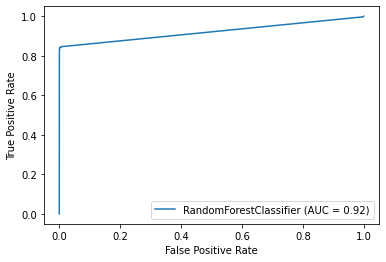

In [ ]:

plot_roc_curve(rf, X_train, y_train)
plt.show()

#### Hyper-parameter tuning for the Random Forest

In [ ]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [ ]:
#Set-1
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10, 25, 50, 100]
}

In [ ]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = kfold,
                           n_jobs=-1, verbose=1, scoring="roc_auc")

In [ ]:
%%time
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed: 36.0min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed: 138.6min
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed: 270.4min finished


CPU times: user 3min 4s, sys: 10.8 s, total: 3min 15s
Wall time: 4h 31min 14s


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=50, shuffle=True),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              

In [ ]:
grid_search.best_score_

0.9779447351309424

In [ ]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
                       oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
#Set-2
params = {
    'max_depth': [8,10,12],
    'min_samples_leaf': [15,20,25],
    'n_estimators': [40,50,60]
}

In [ ]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = kfold,
                           n_jobs=-1, verbose=1, scoring="roc_auc")

In [ ]:
%%time
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 27.3min
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed: 93.7min finished


CPU times: user 1min 40s, sys: 3.4 s, total: 1min 43s
Wall time: 1h 34min 20s


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=50, shuffle=True),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              

In [ ]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=-1,
                       oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
grid_search.best_score_

0.979104328125592

In [ ]:
#Set-3
params = {
    'max_depth': [10],
    'min_samples_leaf': [18,20,22],
    'n_estimators': [35,40,45]
}

In [ ]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = kfold,
                           n_jobs=-1, verbose=1, scoring="roc_auc")

In [ ]:
%%time
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed: 26.0min finished


CPU times: user 1min 23s, sys: 1.08 s, total: 1min 24s
Wall time: 26min 36s


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=50, shuffle=True),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              

In [ ]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=-1,
                       oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
grid_search.best_score_

0.979104328125592

## XG-Boost

In [ ]:
import xgboost as xgb

In [ ]:
xgb_model = xgb.XGBClassifier()

scorer = metrics.make_scorer(metrics.roc_auc_score,
                             greater_is_better=True,
                             needs_proba=True,
                             needs_threshold=False)

In [ ]:
# Default-Run
parameters = {'learning_rate': [0.3],
              'max_depth': [6],
              'min_child_weight': [1],
              'n_estimators': [100]}

clf_xgb = model_selection.GridSearchCV(estimator=xgb_model,
                                       param_grid=parameters,
                                       n_jobs=-1,
                                       cv=kfold,
                                       scoring=scorer,
                                       refit=True)

clf_xgb.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=50, shuffle=True),
             error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:log...
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.3], 'max_depth': [6],
                         'min_child_weight': [

In [ ]:
print(clf_xgb.best_params_)
print(clf_xgb.best_score_)
print(clf_xgb.best_estimator_)

{'learning_rate': 0.3, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 100}
0.9804074174864686
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.3, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


In [ ]:
#Set-1
parameters = {'learning_rate': [0.2, 0.3, 0.4],
              'max_depth': [2, 4, 6, 8, 10],
              'min_child_weight': [1,3,5,7],
              'n_estimators': [30, 50, 70]}

In [ ]:

clf_xgb = model_selection.GridSearchCV(estimator=xgb_model,
                                       param_grid=parameters,
                                       n_jobs=-1,
                                       cv=kfold,
                                       verbose=1,
                                       scoring=scorer,
                                       refit=True)

In [ ]:
%%time
clf_xgb.fit(X_train, y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  9.2min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed: 77.8min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed: 176.1min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed: 310.5min
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed: 357.5min finished


CPU times: user 2min 37s, sys: 13.4 s, total: 2min 50s
Wall time: 5h 58min 28s


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=50, shuffle=True),
             error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:log...
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.2, 0.3, 0.4],
                         'max_depth': [2, 4, 6, 8, 10]

In [ ]:
print(clf_xgb.best_params_)
print(clf_xgb.best_score_)
print(clf_xgb.best_estimator_)

{'learning_rate': 0.2, 'max_depth': 6, 'min_child_weight': 7, 'n_estimators': 70}
0.9838364570927807
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=6,
              min_child_weight=7, missing=None, n_estimators=70, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


In [ ]:
#Set-2
parameters = {'learning_rate': [0.15, 0.2, 0.25],
              'max_depth': [5, 6, 7],
              'min_child_weight': [6,7,8],
              'n_estimators': [60, 70, 80]}

In [ ]:

clf_xgb = model_selection.GridSearchCV(estimator=xgb_model,
                                       param_grid=parameters,
                                       n_jobs=-1,
                                       cv=kfold,
                                       verbose=1,
                                       scoring=scorer,
                                       refit=True)

In [ ]:
%%time
clf_xgb.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 26.2min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed: 114.5min
[Parallel(n_jobs=-1)]: Done 405 out of 405 | elapsed: 230.4min finished


CPU times: user 1min 58s, sys: 7.93 s, total: 2min 6s
Wall time: 3h 51min 25s


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=50, shuffle=True),
             error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:log...
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.15, 0.2, 0.25],
                         'max_depth': [5, 6, 7], 'mi

In [ ]:
print(clf_xgb.best_params_)
print(clf_xgb.best_score_)
print(clf_xgb.best_estimator_)

{'learning_rate': 0.2, 'max_depth': 5, 'min_child_weight': 7, 'n_estimators': 80}
0.9841595008266127
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=5,
              min_child_weight=7, missing=None, n_estimators=80, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


In [ ]:
#Set-3
parameters = {'learning_rate': [0.2],
              'max_depth': [5],
              'min_child_weight': [7,8],
              'n_estimators': [80,90]}

clf_xgb = model_selection.GridSearchCV(estimator=xgb_model,
                                       param_grid=parameters,
                                       n_jobs=-1,
                                       cv=kfold,
                                       verbose=1,
                                       scoring=scorer,
                                       refit=True)

In [ ]:
%%time
clf_xgb.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 11.5min finished


CPU times: user 58.2 s, sys: 556 ms, total: 58.7 s
Wall time: 12min 27s


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=50, shuffle=True),
             error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:log...
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.2], 'max_depth': [5],
                         'min_child_weight': [

In [ ]:
print(clf_xgb.best_params_)
print(clf_xgb.best_score_)
print(clf_xgb.best_estimator_)

{'learning_rate': 0.2, 'max_depth': 5, 'min_child_weight': 7, 'n_estimators': 80}
0.9841595008266127
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=5,
              min_child_weight=7, missing=None, n_estimators=80, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


In [ ]:
clf=clf_xgb.best_estimator_
clf

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=5,
              min_child_weight=7, missing=None, n_estimators=80, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

#### Proceed with the model which shows the best result 
- Apply the best hyperparameter on the model
- Predict on the test dataset

*  **Among all the trained models on raw data set, XG-Boost showed best performance with AUC-ROC score of 0.98416**
*  We will proceed with this model and make predictions for test set.

In [ ]:
#initialise the model with optimum hyperparameters
clf = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=5,
              min_child_weight=7, missing=None, n_estimators=80, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)  
clf.fit(X_train, y_train)
#print --> #print the evaluation score on the X_test by choosing the best evaluation metric

#Predict test data set.
y_pred = clf.predict(X_test)
#Checking performance our model with classification report.
print(classification_report(y_test, y_pred))
#Checking performance our model with ROC Score.
roc_auc_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.92      0.79      0.85       147

    accuracy                           1.00     85443
   macro avg       0.96      0.89      0.92     85443
weighted avg       1.00      1.00      1.00     85443



0.894499203733266

### Inference on above model
* Model has precision of 0.92 and recall of 0.79 in terms of fraud casses.
* Accuracy of model on test set is close to 100%.
* For better performance of model in present case-study, we can further improve model for better Recall so that we properly detect fraud cases.

### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

Top var = 18
2nd Top var = 15
3rd Top var = 13


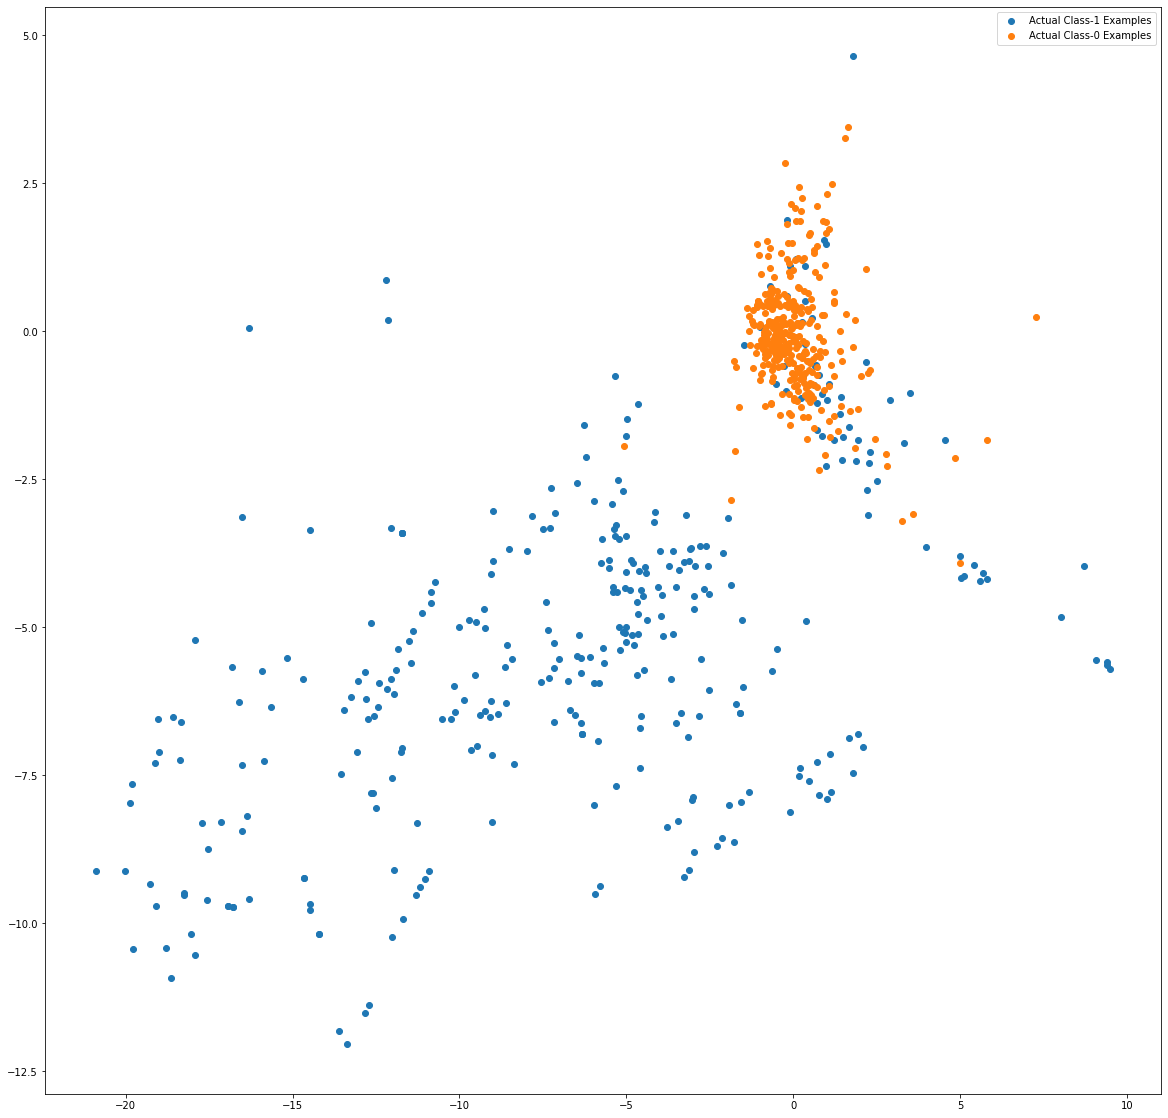

In [ ]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)


top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

* From above plot we can see that there is a decent classification between fraud and non fraud classes.

## Model building with balancing Classes

##### Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

### Random Oversampling

In [17]:
from imblearn import over_sampling #- import the packages
from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler(random_state=50)
X_train_ros,y_train_ros=ros.fit_resample(X_train,y_train)



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
print(X_train.shape)
print(X_train_ros.shape)
print(y_train.shape)
print(y_train_ros.shape)

(199364, 30)
(398038, 30)
(199364,)
(398038,)


## Model Building
- Build different models on the balanced dataset and see the result

## Logistic Regression

In [ ]:

from sklearn import linear_model #import the package

num_C = [0.01,0.1,0.5,0.1,0.2]  #--> list of values
cv_num =5   #--> list of values

In [ ]:
#perform cross validation & then balance classes on X_train_cv & y_train_cv using Random Oversampling
kfold=StratifiedKFold(n_splits=cv_num,shuffle=True,random_state=50)


In [ ]:
logreg=LogisticRegression()
result = cross_val_score(logreg, X=X_train_ros, y=y_train_ros, cv=cv_num, scoring='roc_auc')
print(result.mean())

0.9857028970522699


### Perform hyperparameter tuning

In [ ]:

%%time
logreg=LogisticRegression()
result = cross_val_score(logreg, X=X_train_ros, y=y_train_ros, cv=kfold, scoring='roc_auc')
print(result.mean())

0.9857039545491559
CPU times: user 17.3 s, sys: 6.89 s, total: 24.2 s
Wall time: 12.5 s


In [ ]:
#Set-1
num_C = [0.01,0.1,0.5,0.1,0.2,1.0]
dual=[True,False]
max_iter=[70,80,90,100]
param_grid = dict(C=num_C,dual=dual,max_iter=max_iter)

In [ ]:
%%time

logreg = LogisticRegression(penalty='l2')
grid = GridSearchCV(estimator=logreg, param_grid=param_grid, cv = kfold,verbose=1, n_jobs=-1,scoring='roc_auc')

grid_result = grid.fit(X_train_ros, y_train_ros)
# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:   30.2s
[Parallel(n_jobs=-1)]: Done 200 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  2.9min finished


Best: 0.985704 using {'C': 0.5, 'dual': False, 'max_iter': 70}
CPU times: user 6.13 s, sys: 1.98 s, total: 8.11 s
Wall time: 2min 59s


In [ ]:
#Set-2
num_C = [0.2,0.3,0.4,0.5,0.6,0.7]
dual=[True,False]
max_iter=[50,60,70]
param_grid = dict(C=num_C,dual=dual,max_iter=max_iter)

In [ ]:
%%time

grid = GridSearchCV(estimator=logreg, param_grid=param_grid, cv = kfold,verbose=1, n_jobs=-1,scoring='roc_auc')

grid_result = grid.fit(X_train_ros, y_train_ros)
# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  62 tasks      | elapsed:   43.7s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  2.2min finished


Best: 0.985705 using {'C': 0.3, 'dual': False, 'max_iter': 50}
CPU times: user 5.64 s, sys: 1.79 s, total: 7.43 s
Wall time: 2min 17s


In [ ]:
log_best_ros=grid_result.best_estimator_
log_best_ros

LogisticRegression(C=0.3, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=50,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Decision Tree

In [19]:
#Default Run
dt_base = DecisionTreeClassifier(random_state=42, max_depth=4)

#Training the model.
model=dt_base.fit(X_train_ros, y_train_ros)
#Predict train data set.
y_pred_ros = model.predict(X_test)
#Checking performance our model with classification report.
print(classification_report(y_test, y_pred_ros))
#Checking performance our model with ROC Score.
roc_auc_score(y_test, y_pred_ros)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85296
           1       0.06      0.88      0.11       147

    accuracy                           0.98     85443
   macro avg       0.53      0.93      0.55     85443
weighted avg       1.00      0.98      0.99     85443



0.9266354332954341

In [ ]:
# Hyper-parameter tuning for the Decision Tree
#Set-1
dt = DecisionTreeClassifier(random_state=42)
params = {
    "max_depth": [2,3,5,10,20],
    "min_samples_leaf": [5,10,20,50,80]
}


In [ ]:
%%time
grid = GridSearchCV(estimator=dt, param_grid=params, cv = kfold,verbose=1, n_jobs=-1,scoring='roc_auc')
best_model = grid.fit(X_train_ros,y_train_ros)

print('Best max_depth:', best_model.best_estimator_.get_params()['max_depth'])
print('Best min_samples_leaf:', best_model.best_estimator_.get_params()['min_samples_leaf'])
print("Best score using above parameters: " ,best_model.best_score_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:  8.1min finished


Best max_depth: 20
Best min_samples_leaf: 10
Best score using above parameters:  0.9998189948554284
CPU times: user 12.8 s, sys: 428 ms, total: 13.2 s
Wall time: 8min 14s


In [ ]:
#Set-2
dt = DecisionTreeClassifier(random_state=42)
params = {
    "max_depth": [15,20,25],
    "min_samples_leaf": [8,10,12,15]
}

In [ ]:
%%time
grid = GridSearchCV(estimator=dt, param_grid=params, cv = kfold,verbose=1, n_jobs=-1,scoring='roc_auc')
best_model = grid.fit(X_train_ros,y_train_ros)

print('Best max_depth:', best_model.best_estimator_.get_params()['max_depth'])
print('Best min_samples_leaf:', best_model.best_estimator_.get_params()['min_samples_leaf'])
print("Best score using above parameters: " ,best_model.best_score_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  5.4min finished


Best max_depth: 20
Best min_samples_leaf: 10
Best score using above parameters:  0.9998189948554284
CPU times: user 11.7 s, sys: 261 ms, total: 11.9 s
Wall time: 5min 35s


In [ ]:
dt_best_ros=best_model.best_estimator_
dt_best_ros

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=20, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

## Random Forest

In [ ]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
rf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
#Default Run
params = {
    'min_samples_leaf': [1],
    'n_estimators': [100]
}

In [ ]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = kfold,
                           n_jobs=-1, verbose=1, scoring="roc_auc")

In [ ]:
%%time
grid_search.fit(X_train_ros, y_train_ros)


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  9.0min finished


CPU times: user 4min 35s, sys: 746 ms, total: 4min 36s
Wall time: 11min 19s


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=50, shuffle=True),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              

In [ ]:
grid_search.best_score_

0.9999974876896793

In [ ]:
#Set-1
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100],
    'n_estimators': [10, 30, 50,80]
}
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = kfold,
                           n_jobs=-1, verbose=1, scoring="roc_auc")

In [ ]:
%%time
grid_search.fit(X_train_ros, y_train_ros)


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed: 45.1min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed: 188.4min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 230.0min finished


CPU times: user 4min 28s, sys: 8.35 s, total: 4min 36s
Wall time: 3h 51min 42s


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=50, shuffle=True),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              

In [ ]:
grid_search.best_score_

0.9999972079301157

In [ ]:
rf_best_ros = grid_search.best_estimator_
rf_best_ros

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=-1,
                       oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
#Set-2
params = {
    'max_depth': [15,20,25],
    'min_samples_leaf': [4,5,8,10],
    'n_estimators': [70,80,90]
}
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = kfold,
                           n_jobs=-1, verbose=1, scoring="roc_auc")

In [ ]:
%%time
grid_search.fit(X_train_ros, y_train_ros)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 58.6min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed: 230.8min finished


CPU times: user 4min 36s, sys: 8.46 s, total: 4min 44s
Wall time: 3h 52min 37s


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=50, shuffle=True),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              

In [ ]:
grid_search.best_score_

0.9999974909344115

In [ ]:

rf_best_ros = grid_search.best_estimator_
rf_best_ros

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=90, n_jobs=-1,
                       oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

## XG-Boost

In [ ]:
xgb_model = xgb.XGBClassifier()

scorer = metrics.make_scorer(metrics.roc_auc_score,
                             greater_is_better=True,
                             needs_proba=True,
                             needs_threshold=False)

In [ ]:
# Default-Run
parameters = {'learning_rate': [0.3],
              'max_depth': [6],
              'min_child_weight': [1],
              'n_estimators': [100]}

clf_xgb = model_selection.GridSearchCV(estimator=xgb_model,
                                       param_grid=parameters,
                                       n_jobs=-1,
                                       cv=kfold,
                                       scoring=scorer,
                                       refit=True)

clf_xgb.fit(X_train_ros, y_train_ros)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=50, shuffle=True),
             error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:log...
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.3], 'max_depth': [6],
                         'min_child_weight': [

In [ ]:
print(clf_xgb.best_params_)
print(clf_xgb.best_score_)
print(clf_xgb.best_estimator_)

{'learning_rate': 0.3, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 100}
0.9999914249667838
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.3, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


In [ ]:
#Set-1
parameters = {'learning_rate': [0.2, 0.3, 0.4],
              'max_depth': [4,6,8],
              'min_child_weight': [1,2,3],
              'n_estimators': [40,50,60]}

In [ ]:
clf_xgb = model_selection.GridSearchCV(estimator=xgb_model,
                                       param_grid=parameters,
                                       n_jobs=-1,
                                       cv=kfold,
                                       scoring=scorer,
                                       refit=True)

clf_xgb.fit(X_train_ros, y_train_ros)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=50, shuffle=True),
             error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:log...
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.2, 0.3, 0.4],
                         'max_depth': [4, 6, 8], 'min_

In [ ]:
print(clf_xgb.best_params_)
print(clf_xgb.best_score_)
print(clf_xgb.best_estimator_)

{'learning_rate': 0.3, 'max_depth': 8, 'min_child_weight': 1, 'n_estimators': 60}
0.999990786572004
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.3, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=None, n_estimators=60, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


In [ ]:
xgb_best_ros=clf_xgb.best_estimator_
xgb_best_ros

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.3, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=None, n_estimators=60, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
#Set-2
parameters = {'learning_rate': [0.3],
              'max_depth': [8],
              'min_child_weight': [1],
              'n_estimators': [100]}

In [ ]:
clf_xgb = model_selection.GridSearchCV(estimator=xgb_model,
                                       param_grid=parameters,
                                       n_jobs=-1,
                                       cv=kfold,
                                       scoring=scorer,
                                       refit=True)

clf_xgb.fit(X_train_ros, y_train_ros)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=50, shuffle=True),
             error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:log...
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.3], 'max_depth': [8],
                         'min_child_weight': [

In [ ]:
print(clf_xgb.best_params_)
print(clf_xgb.best_score_)
print(clf_xgb.best_estimator_)

{'learning_rate': 0.3, 'max_depth': 8, 'min_child_weight': 1, 'n_estimators': 100}
0.9999916792527003
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.3, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


In [ ]:
xgb_best_ros=clf_xgb.best_estimator_
xgb_best_ros

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.3, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

### Similarly explore other algorithms on balanced dataset by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

### Print the class distribution after applying SMOTE 

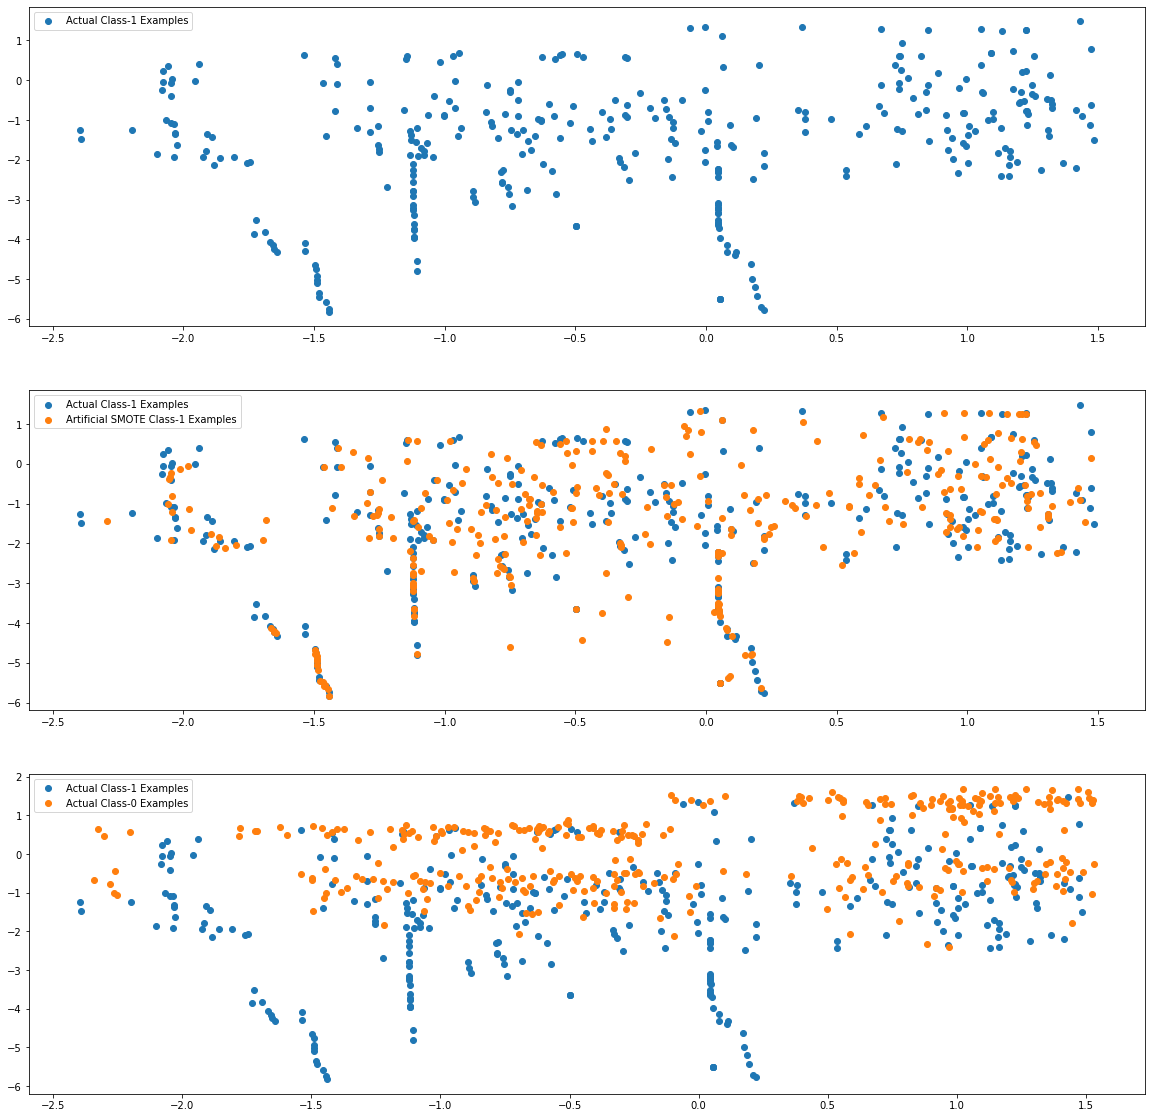

In [20]:
import warnings
warnings.filterwarnings("ignore")


sm = over_sampling.SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1[:X_train_1.shape[0], 0], X_train_smote_1[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

## Logistic Regression

In [ ]:
logreg=LogisticRegression()
result = cross_val_score(logreg, X=X_train_smote, y=y_train_smote, cv=cv_num, scoring='roc_auc')
print(result.mean())


0.9893435244086423


In [ ]:
#perform hyperparameter tuning
%%time
logreg=LogisticRegression()
result = cross_val_score(logreg, X=X_train_smote, y=y_train_smote, cv=kfold, scoring='roc_auc')
print(result.mean())

0.9893433954768085
CPU times: user 20.5 s, sys: 8.19 s, total: 28.7 s
Wall time: 14.8 s


In [ ]:
#Set-1
num_C = [0.001,0.05,0.1,0.15,0.2,1.0]
dual=[True,False]
max_iter=[70,80,90,100]
param_grid = dict(C=num_C,dual=dual,max_iter=max_iter)

In [ ]:
%%time

logreg = LogisticRegression(penalty='l2')
grid = GridSearchCV(estimator=logreg, param_grid=param_grid, cv = kfold,verbose=1, n_jobs=-1,scoring='roc_auc')

grid_result = grid.fit(X_train_smote, y_train_smote)
# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  62 tasks      | elapsed:   25.6s
[Parallel(n_jobs=-1)]: Done 212 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  3.3min finished


Best: 0.989343 using {'C': 1.0, 'dual': False, 'max_iter': 70}
CPU times: user 6.97 s, sys: 2.09 s, total: 9.06 s
Wall time: 3min 20s


In [ ]:
#Set-2
num_C = [0.5,0.8,1.0,1.2,1.5]
dual=[True,False]
max_iter=[50,70,100]
param_grid = dict(C=num_C,dual=dual,max_iter=max_iter)

In [ ]:
%%time

logreg = LogisticRegression(penalty='l2')
grid = GridSearchCV(estimator=logreg, param_grid=param_grid, cv = kfold,verbose=1, n_jobs=-1,scoring='roc_auc')

grid_result = grid.fit(X_train_smote, y_train_smote)
# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  62 tasks      | elapsed:   54.9s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  2.3min finished


Best: 0.989344 using {'C': 1.5, 'dual': False, 'max_iter': 50}
CPU times: user 6.24 s, sys: 2.01 s, total: 8.25 s
Wall time: 2min 21s


In [ ]:
log_best_smote=grid_result.best_estimator_
log_best_smote

LogisticRegression(C=1.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=50,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Decision Tree

In [21]:
dt_base = DecisionTreeClassifier(random_state=42, max_depth=4)

#Training the model.
model=dt_base.fit(X_train_smote, y_train_smote)
#Predict test data set.
y_pred_smote = model.predict(X_test)
#Checking performance our model with classification report.
print(classification_report(y_test, y_pred_smote))
#Checking performance our model with ROC Score.
roc_auc_score(y_test, y_pred_smote)

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     85296
           1       0.05      0.90      0.10       147

    accuracy                           0.97     85443
   macro avg       0.53      0.94      0.54     85443
weighted avg       1.00      0.97      0.98     85443



0.9380895436396279

In [ ]:
# Hyper-parameter tuning for the Decision Tree
#Set-1
dt = DecisionTreeClassifier(random_state=42)
params = {
    "max_depth": [2,3,5,10,20],
    "min_samples_leaf": [5,10,20,50,80]
}

In [ ]:
%%time
grid = GridSearchCV(estimator=dt, param_grid=params, cv = kfold,verbose=1, n_jobs=-1,scoring='roc_auc')
best_model = grid.fit(X_train_smote,y_train_smote)

print('Best max_depth:', best_model.best_estimator_.get_params()['max_depth'])
print('Best min_samples_leaf:', best_model.best_estimator_.get_params()['min_samples_leaf'])
print("Best score using above parameters: " ,best_model.best_score_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed: 18.9min finished


Best max_depth: 20
Best min_samples_leaf: 80
Best score using above parameters:  0.9991162653686401
CPU times: user 44 s, sys: 826 ms, total: 44.9 s
Wall time: 19min 31s


In [ ]:
#Set-2
dt = DecisionTreeClassifier(random_state=42)
params = {
    "max_depth": [15,20,25],
    "min_samples_leaf": [70,80,90]
}

In [ ]:
%%time
grid = GridSearchCV(estimator=dt, param_grid=params, cv = kfold,verbose=1, n_jobs=-1,scoring='roc_auc')
best_model = grid.fit(X_train_smote,y_train_smote)

print('Best max_depth:', best_model.best_estimator_.get_params()['max_depth'])
print('Best min_samples_leaf:', best_model.best_estimator_.get_params()['min_samples_leaf'])
print("Best score using above parameters: " ,best_model.best_score_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed: 13.2min finished


Best max_depth: 15
Best min_samples_leaf: 70
Best score using above parameters:  0.9991338155979126
CPU times: user 36.1 s, sys: 623 ms, total: 36.7 s
Wall time: 13min 41s


In [ ]:
#Set-3
dt = DecisionTreeClassifier(random_state=42)
params = {
    "max_depth": [12,15,17],
    "min_samples_leaf": [55,60,65,70]
}

In [ ]:
%%time
grid = GridSearchCV(estimator=dt, param_grid=params, cv = kfold,verbose=1, n_jobs=-1,scoring='roc_auc')
best_model = grid.fit(X_train_smote,y_train_smote)

print('Best max_depth:', best_model.best_estimator_.get_params()['max_depth'])
print('Best min_samples_leaf:', best_model.best_estimator_.get_params()['min_samples_leaf'])
print("Best score using above parameters: " ,best_model.best_score_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 11.9min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 15.9min finished


Best max_depth: 15
Best min_samples_leaf: 70
Best score using above parameters:  0.9991338155979126
CPU times: user 37 s, sys: 748 ms, total: 37.8 s
Wall time: 16min 28s


In [ ]:
dt_best_smote=best_model.best_estimator_
dt_best_smote

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=15, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=70, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

## Random Forest

In [ ]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
rf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
#default parameters
params = {
    'min_samples_leaf': [1],
    'n_estimators': [100]
}
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = kfold,
                           n_jobs=-1, verbose=1, scoring="roc_auc")

In [ ]:
%%time
grid_search.fit(X_train_smote, y_train_smote)


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 17.4min finished


CPU times: user 8min 57s, sys: 1.01 s, total: 8min 58s
Wall time: 21min 53s


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=50, shuffle=True),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              

In [ ]:
grid_search.best_score_

0.9999962011678644

In [ ]:
#Set-1
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100],
    'n_estimators': [10, 30, 50,80]
}
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = kfold,
                           n_jobs=-1, verbose=1, scoring="roc_auc")

In [ ]:
%%time
grid_search.fit(X_train_smote, y_train_smote)


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 11.3min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed: 61.9min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed: 292.2min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 369.1min finished


CPU times: user 8min 47s, sys: 13 s, total: 8min 59s
Wall time: 6h 12min 34s


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=50, shuffle=True),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              

In [ ]:
grid_search.best_score_

0.9999881988899674

In [ ]:
rf_best_smote = grid_search.best_estimator_
rf_best_smote

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=-1,
                       oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
#Set-2
params = {
    'max_depth': [8,15,20,25],
    'min_samples_leaf': [5,8,10],
    'n_estimators': [60,70,80]
}
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = kfold,
                           n_jobs=-1, verbose=1, scoring="roc_auc")

In [ ]:
%%time
grid_search.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 73.4min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed: 393.4min finished


CPU times: user 7min 54s, sys: 12.2 s, total: 8min 6s
Wall time: 6h 36min 36s


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=50, shuffle=True),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              

In [ ]:
grid_search.best_score_

0.9999900576881267

In [ ]:
rf_best_smote = grid_search.best_estimator_
rf_best_smote

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=70, n_jobs=-1,
                       oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
#Set-3
params = {
    'max_depth': [20],
    'min_samples_leaf': [7,8,],
    'n_estimators': [90,100]
}
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = kfold,
                           n_jobs=-1, verbose=1, scoring="roc_auc")

In [ ]:
%%time
grid_search.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 62.8min finished


CPU times: user 8min 37s, sys: 2.6 s, total: 8min 39s
Wall time: 1h 7min 3s


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=50, shuffle=True),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              

In [ ]:
grid_search.best_score_

0.9999916529664507

In [ ]:
rf_best_smote = grid_search.best_estimator_
rf_best_smote

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

## XG-Boost

In [ ]:
xgb_model = xgb.XGBClassifier()

scorer = metrics.make_scorer(metrics.roc_auc_score,
                             greater_is_better=True,
                             needs_proba=True,
                             needs_threshold=False)

In [ ]:
# Default-Run 
parameters = {'learning_rate': [0.3],
              'max_depth': [6],
              'min_child_weight': [1],
              'n_estimators': [100]}

clf_xgb = model_selection.GridSearchCV(estimator=xgb_model,
                                       param_grid=parameters,
                                       n_jobs=-1,
                                       cv=kfold,
                                       scoring=scorer,
                                       refit=True)

clf_xgb.fit(X_train_smote, y_train_smote)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=50, shuffle=True),
             error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:log...
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.3], 'max_depth': [6],
                         'min_child_weight': [

In [ ]:
print(clf_xgb.best_params_)
print(clf_xgb.best_score_)
print(clf_xgb.best_estimator_)

{'learning_rate': 0.3, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 100}
0.9999879610273616
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.3, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


In [ ]:
#Set-1
parameters = {'learning_rate': [0.1,0.2,0.3],
              'max_depth': [4,6,8,10],
              'min_child_weight': [1,2],
              'n_estimators': [10,20,30,40,50]}

clf_xgb = model_selection.GridSearchCV(estimator=xgb_model,
                                       param_grid=parameters,
                                       n_jobs=-1,
                                       cv=kfold,
                                       verbose=1,
                                       scoring=scorer,
                                       refit=True)

In [ ]:
%%time

clf_xgb.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 22.1min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed: 178.9min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed: 391.6min
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed: 545.8min finished


CPU times: user 5min 42s, sys: 21.4 s, total: 6min 4s
Wall time: 9h 8min 49s


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=50, shuffle=True),
             error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:log...
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.2, 0.3],
                         'max_depth': [4, 6, 8, 10], '

In [ ]:
print(clf_xgb.best_params_)
print(clf_xgb.best_score_)
print(clf_xgb.best_estimator_)

{'learning_rate': 0.3, 'max_depth': 10, 'min_child_weight': 2, 'n_estimators': 50}
0.9999843504805618
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.3, max_delta_step=0, max_depth=10,
              min_child_weight=2, missing=None, n_estimators=50, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


In [ ]:
xgb_best_smote=clf_xgb.best_estimator_
xgb_best_smote

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.3, max_delta_step=0, max_depth=10,
              min_child_weight=2, missing=None, n_estimators=50, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
#Set-2
parameters = {'learning_rate': [0.3,0.4],
              'max_depth': [10,12,14],
              'min_child_weight': [2,3],
              'n_estimators': [50,70,100]}

clf_xgb = model_selection.GridSearchCV(estimator=xgb_model,
                                       param_grid=parameters,
                                       n_jobs=-1,
                                       cv=kfold,
                                       verbose=1,
                                       scoring=scorer,
                                       refit=True)

In [ ]:
%%time

clf_xgb.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 102.6min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed: 389.0min finished


CPU times: user 6min 35s, sys: 14.6 s, total: 6min 50s
Wall time: 6h 33min 42s


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=50, shuffle=True),
             error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:log...
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.3, 0.4], 'max_depth': [10, 12, 14],
                         'min_ch

In [ ]:
print(clf_xgb.best_params_)
print(clf_xgb.best_score_)
print(clf_xgb.best_estimator_)

{'learning_rate': 0.3, 'max_depth': 14, 'min_child_weight': 3, 'n_estimators': 100}
0.9999887153780266
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.3, max_delta_step=0, max_depth=14,
              min_child_weight=3, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


In [ ]:
xgb_best_smote=clf_xgb.best_estimator_
xgb_best_smote

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.3, max_delta_step=0, max_depth=14,
              min_child_weight=3, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

### Print the class distribution after applying ADASYN

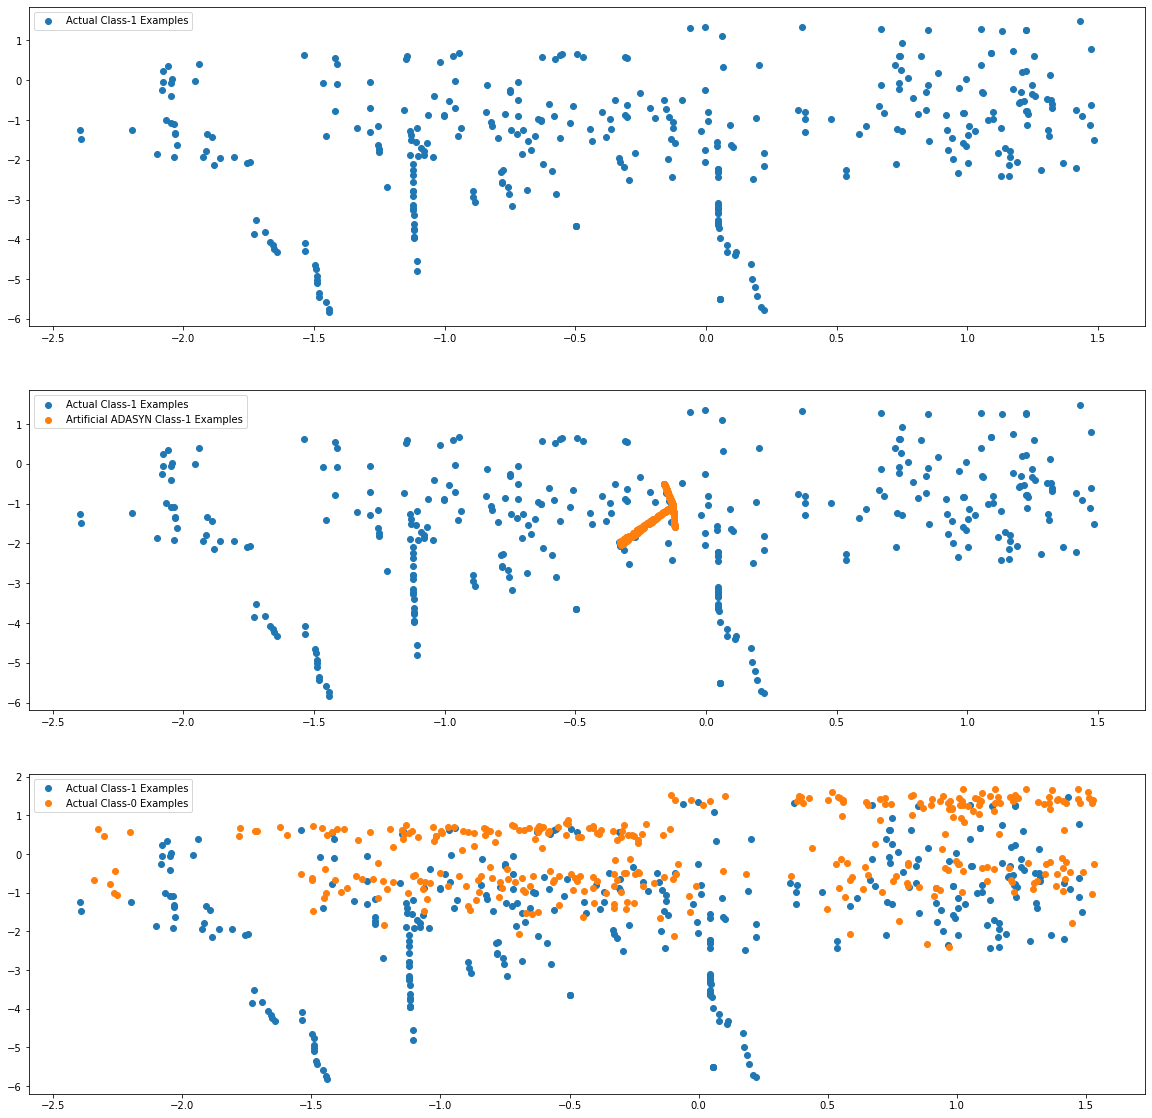

In [22]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1[:X_train_1.shape[0], 0], X_train_adasyn_1[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

## Logistic Regression

In [ ]:
logreg=LogisticRegression()
result = cross_val_score(logreg, X=X_train_adasyn, y=y_train_adasyn, cv=cv_num, scoring='roc_auc')
print(result.mean())


0.9436502073434774


In [ ]:
#perform hyperparameter tuning
%%time
logreg=LogisticRegression()
result = cross_val_score(logreg, X=X_train_adasyn, y=y_train_adasyn, cv=kfold, scoring='roc_auc')
print(result.mean())

0.9641841294175038
CPU times: user 22.1 s, sys: 8.81 s, total: 30.9 s
Wall time: 15.9 s


In [ ]:
#Set-1
num_C = [0.001,0.05,0.1,0.15,0.2,1.0]
dual=[True,False]
max_iter=[70,80,90,100]
param_grid = dict(C=num_C,dual=dual,max_iter=max_iter)

In [ ]:
%%time

logreg = LogisticRegression(penalty='l2')
grid = GridSearchCV(estimator=logreg, param_grid=param_grid, cv = kfold,verbose=1, n_jobs=-1,scoring='roc_auc')

grid_result = grid.fit(X_train_adasyn, y_train_adasyn)
# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:   26.5s
[Parallel(n_jobs=-1)]: Done 200 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  3.7min finished


Best: 0.964184 using {'C': 1.0, 'dual': False, 'max_iter': 70}
CPU times: user 7.6 s, sys: 2.45 s, total: 10 s
Wall time: 3min 47s


In [ ]:
#Set-2
num_C = [0.5,0.8,1.0,1.2,1.5]
dual=[True,False]
max_iter=[50,60,70]
param_grid = dict(C=num_C,dual=dual,max_iter=max_iter)

In [ ]:
%%time

logreg = LogisticRegression(penalty='l2')
grid = GridSearchCV(estimator=logreg, param_grid=param_grid, cv = kfold,verbose=1, n_jobs=-1,scoring='roc_auc')

grid_result = grid.fit(X_train_adasyn, y_train_adasyn)
# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:   42.2s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  2.5min finished


Best: 0.964185 using {'C': 1.5, 'dual': False, 'max_iter': 50}
CPU times: user 7.24 s, sys: 2.55 s, total: 9.79 s
Wall time: 2min 34s


In [ ]:
log_best_adasyn=grid_result.best_estimator_
log_best_adasyn

LogisticRegression(C=1.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=50,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Decision Tree

In [23]:
dt_base = DecisionTreeClassifier(random_state=42, max_depth=4)

#Training the model.
model=dt_base.fit(X_train_adasyn, y_train_adasyn)
#Predict test data set.
y_pred_adasyn = model.predict(X_test)
#Checking performance our model with classification report.
print(classification_report(y_test, y_pred_adasyn))
#Checking performance our model with ROC Score.
roc_auc_score(y_test, y_pred_adasyn)

              precision    recall  f1-score   support

           0       1.00      0.90      0.95     85296
           1       0.02      0.91      0.03       147

    accuracy                           0.90     85443
   macro avg       0.51      0.91      0.49     85443
weighted avg       1.00      0.90      0.94     85443



0.9050706734579033

In [ ]:
# Hyper-parameter tuning for the Decision Tree
#Set-1
dt = DecisionTreeClassifier(random_state=42)
params = {
    "max_depth": [2,3,5,10,20],
    "min_samples_leaf": [5,10,20,50,80]
}

In [ ]:
%%time
grid = GridSearchCV(estimator=dt, param_grid=params, cv = kfold,verbose=1, n_jobs=-1,scoring='roc_auc')
best_model = grid.fit(X_train_adasyn,y_train_adasyn)

print('Best max_depth:', best_model.best_estimator_.get_params()['max_depth'])
print('Best min_samples_leaf:', best_model.best_estimator_.get_params()['min_samples_leaf'])
print("Best score using above parameters: " ,best_model.best_score_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed: 18.8min finished


Best max_depth: 20
Best min_samples_leaf: 80
Best score using above parameters:  0.9973044477324212
CPU times: user 39.2 s, sys: 791 ms, total: 40 s
Wall time: 19min 22s


In [ ]:
#Set-2
dt = DecisionTreeClassifier(random_state=42)
params = {
    "max_depth": [15,20,25],
    "min_samples_leaf": [70,80,90]
}

In [ ]:
%%time
grid = GridSearchCV(estimator=dt, param_grid=params, cv = kfold,verbose=1, n_jobs=-1,scoring='roc_auc')
best_model = grid.fit(X_train_adasyn,y_train_adasyn)

print('Best max_depth:', best_model.best_estimator_.get_params()['max_depth'])
print('Best min_samples_leaf:', best_model.best_estimator_.get_params()['min_samples_leaf'])
print("Best score using above parameters: " ,best_model.best_score_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed: 13.6min finished


Best max_depth: 25
Best min_samples_leaf: 90
Best score using above parameters:  0.9985626965169114
CPU times: user 41 s, sys: 540 ms, total: 41.6 s
Wall time: 14min 15s


In [ ]:
#Set-3
dt = DecisionTreeClassifier(random_state=42)
params = {
    "max_depth": [25,30],
    "min_samples_leaf": [90,100]
}

In [ ]:
%%time
grid = GridSearchCV(estimator=dt, param_grid=params, cv = kfold,verbose=1, n_jobs=-1,scoring='roc_auc')
best_model = grid.fit(X_train_adasyn,y_train_adasyn)

print('Best max_depth:', best_model.best_estimator_.get_params()['max_depth'])
print('Best min_samples_leaf:', best_model.best_estimator_.get_params()['min_samples_leaf'])
print("Best score using above parameters: " ,best_model.best_score_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  6.8min finished


Best max_depth: 30
Best min_samples_leaf: 90
Best score using above parameters:  0.998767964015354
CPU times: user 40.8 s, sys: 266 ms, total: 41 s
Wall time: 7min 27s


In [ ]:
dt_best_adasyn=best_model.best_estimator_
dt_best_adasyn

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=15, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=70, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

## Random Forest

In [ ]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
rf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
#default parameters
params = {
    'min_samples_leaf': [1],
    'n_estimators': [100]
}
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = kfold,
                           n_jobs=-1, verbose=1, scoring="roc_auc")

In [ ]:
%%time
grid_search.fit(X_train_adasyn, y_train_adasyn)


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 20.0min finished


CPU times: user 10min 10s, sys: 1.01 s, total: 10min 11s
Wall time: 25min 10s


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=50, shuffle=True),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              

In [ ]:
grid_search.best_score_

0.999994352650544

In [ ]:
#Hyperparameter tuning
#Set-1
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20],
    'n_estimators': [50,80]
}
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = kfold,
                           n_jobs=-1, verbose=1, scoring="roc_auc")

In [ ]:
%%time
grid_search.fit(X_train_adasyn, y_train_adasyn)


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 19.3min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 148.9min finished


CPU times: user 6min 40s, sys: 6.63 s, total: 6min 46s
Wall time: 2h 31min 55s


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=50, shuffle=True),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              

In [ ]:
grid_search.best_score_

0.9999903158001147

In [ ]:
rf_best_adasyn = grid_search.best_estimator_
rf_best_adasyn

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=-1,
                       oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
#Set-2
params = {
    'max_depth': [18,20,22],
    'min_samples_leaf': [4,5,6],
    'n_estimators': [80,100]
}
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = kfold,
                           n_jobs=-1, verbose=1, scoring="roc_auc")

In [ ]:
%%time
grid_search.fit(X_train_adasyn, y_train_adasyn)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 129.1min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed: 254.8min finished


CPU times: user 8min 35s, sys: 5.15 s, total: 8min 40s
Wall time: 4h 18min 48s


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=50, shuffle=True),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              

In [ ]:
grid_search.best_score_

0.9999942341888041

In [ ]:
rf_best_adasyn = grid_search.best_estimator_
rf_best_adasyn

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

## XG-Boost

In [ ]:
xgb_model = xgb.XGBClassifier(tree_method='hist')

scorer = metrics.make_scorer(metrics.roc_auc_score,
                             greater_is_better=True,
                             needs_proba=True,
                             needs_threshold=False)

In [ ]:

# Default-Run 
parameters = {'learning_rate': [0.3],
              'max_depth': [6],
              'min_child_weight': [1],
              'n_estimators': [100]}

clf_xgb = model_selection.GridSearchCV(estimator=xgb_model,
                                       param_grid=parameters,
                                       n_jobs=-1,
                                       cv=kfold,
                                       scoring=scorer,
                                       refit=True)

clf_xgb.fit(X_train_adasyn, y_train_adasyn)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=50, shuffle=True),
             error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:log...
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.3], 'max_depth': [6],
                         'min_child_weight': [

In [ ]:
print(clf_xgb.best_params_)
print(clf_xgb.best_score_)
print(clf_xgb.best_estimator_)

{'learning_rate': 0.3, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 100}
0.9999843314942212
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.3, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


In [ ]:
#Hyperparameter Tuning
#Set-1
parameters = {'learning_rate': [0.1,0.2,0.3],
              'max_depth': [4,6,8],
              'min_child_weight': [1,2],
              'n_estimators': [80,100]}

clf_xgb = model_selection.GridSearchCV(estimator=xgb_model,
                                       param_grid=parameters,
                                       n_jobs=-1,
                                       cv=kfold,
                                       verbose=1,
                                       scoring=scorer,
                                       refit=True)

In [ ]:
%%time

clf_xgb.fit(X_train_adasyn, y_train_adasyn)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed: 27.9min finished


CPU times: user 20.3 s, sys: 777 ms, total: 21.1 s
Wall time: 28min 7s


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=50, shuffle=True),
             error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:log...
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, tree_method='hist',
                                     verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.2, 0.3

In [ ]:
print(clf_xgb.best_params_)
print(clf_xgb.best_score_)
print(clf_xgb.best_estimator_)

{'learning_rate': 0.3, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 100}
0.9999843954269547
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.3, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, tree_method='hist', verbosity=1)


In [ ]:
xgb_best_adasyn=clf_xgb.best_estimator_
xgb_best_adasyn

In [ ]:
#Set-2
parameters = {'learning_rate': [0.3,0.4],
              'max_depth': [5,6,7,9],
              'min_child_weight': [1,3],
              'n_estimators': [90,100]}

clf_xgb = model_selection.GridSearchCV(estimator=xgb_model,
                                       param_grid=parameters,
                                       n_jobs=-1,
                                       cv=kfold,
                                       verbose=1,
                                       scoring=scorer,
                                       refit=True)

In [ ]:
%%time

clf_xgb.fit(X_train_adasyn, y_train_adasyn)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed: 26.9min finished


CPU times: user 23.8 s, sys: 1.33 s, total: 25.1 s
Wall time: 27min 10s


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=50, shuffle=True),
             error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:log...
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, tree_method='hist',
                                     verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.3, 0.4], 'm

In [ ]:
print(clf_xgb.best_params_)
print(clf_xgb.best_score_)
print(clf_xgb.best_estimator_)

{'learning_rate': 0.4, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 100}
0.9999851889375883
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.4, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, tree_method='hist', verbosity=1)


In [ ]:
xgb_best_smote=clf_xgb.best_estimator_
xgb_best_smote

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.4, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, tree_method='hist', verbosity=1)

### Select the oversampling method which shows the best result on a model
- Apply the best hyperparameter on the model
- Predict on the test dataset

*  **Among all the trained models on balanced data set, Random Forest showed best performance with AUC-ROC score of 0.9999975 with Random Over Sampling technique.**
*  We will proceed with this model and make predictions on test set.

In [24]:
from imblearn import over_sampling #- import the packages
from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler(random_state=50)
X_train_ros,y_train_ros=ros.fit_resample(X_train,y_train)

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,roc_auc_score
from sklearn.metrics import accuracy_score

In [40]:
# perform the best oversampling method on X_train & y_train

clf = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=90, n_jobs=-1,
                       oob_score=False, random_state=42, verbose=0,
                       warm_start=False)  #initialise the model with optimum hyperparameters
clf.fit(X_train_ros,y_train_ros ) # fit on the balanced dataset

y_test_pred_ros = clf.predict(X_test)

#print the evaluation score on the X_test by choosing the best evaluation metric
print(classification_report(y_test, y_test_pred_ros))

print('The accuracy on test set is: ',accuracy_score(y_test, y_test_pred_ros))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.85      0.80      0.82       147

    accuracy                           1.00     85443
   macro avg       0.93      0.90      0.91     85443
weighted avg       1.00      1.00      1.00     85443

The accuracy on test set is:  0.9994148145547324


In [30]:
y_train_pred_ros = clf.predict(X_train)
y_test_pred_ros = clf.predict(X_test)

In [32]:
print('The ROC-AUC score on train set: ',roc_auc_score(y_train, y_train_pred_ros))
print('The ROC-AUC score on test set: ',roc_auc_score(y_test, y_test_pred_ros))

The ROC-AUC score on train set:  0.9999321672805109
The ROC-AUC score on test set:  0.8978419448814978


In [33]:

print('The accuracy score on train set: ',accuracy_score(y_train, y_train_pred_ros))
print('The accuracy score on test set: ',accuracy_score(y_test, y_test_pred_ros))

The accuracy score on train set:  0.9998645693304709
The accuracy score on test set:  0.9994148145547324


In [34]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_test_pred_ros)

array([[85276,    20],
       [   30,   117]])

### Inference on above model
* Model has precision of 0.85 and recall of 0.80 in terms of fraud casses.
* Accuracy of model on test set is close to 99.94%.
* For better performance of model in present case-study, we can further improve model for better Recall so that we properly detect fraud cases.

### Print the important features of the best model to understand the dataset

Top var = 15
2nd Top var = 11
3rd Top var = 13


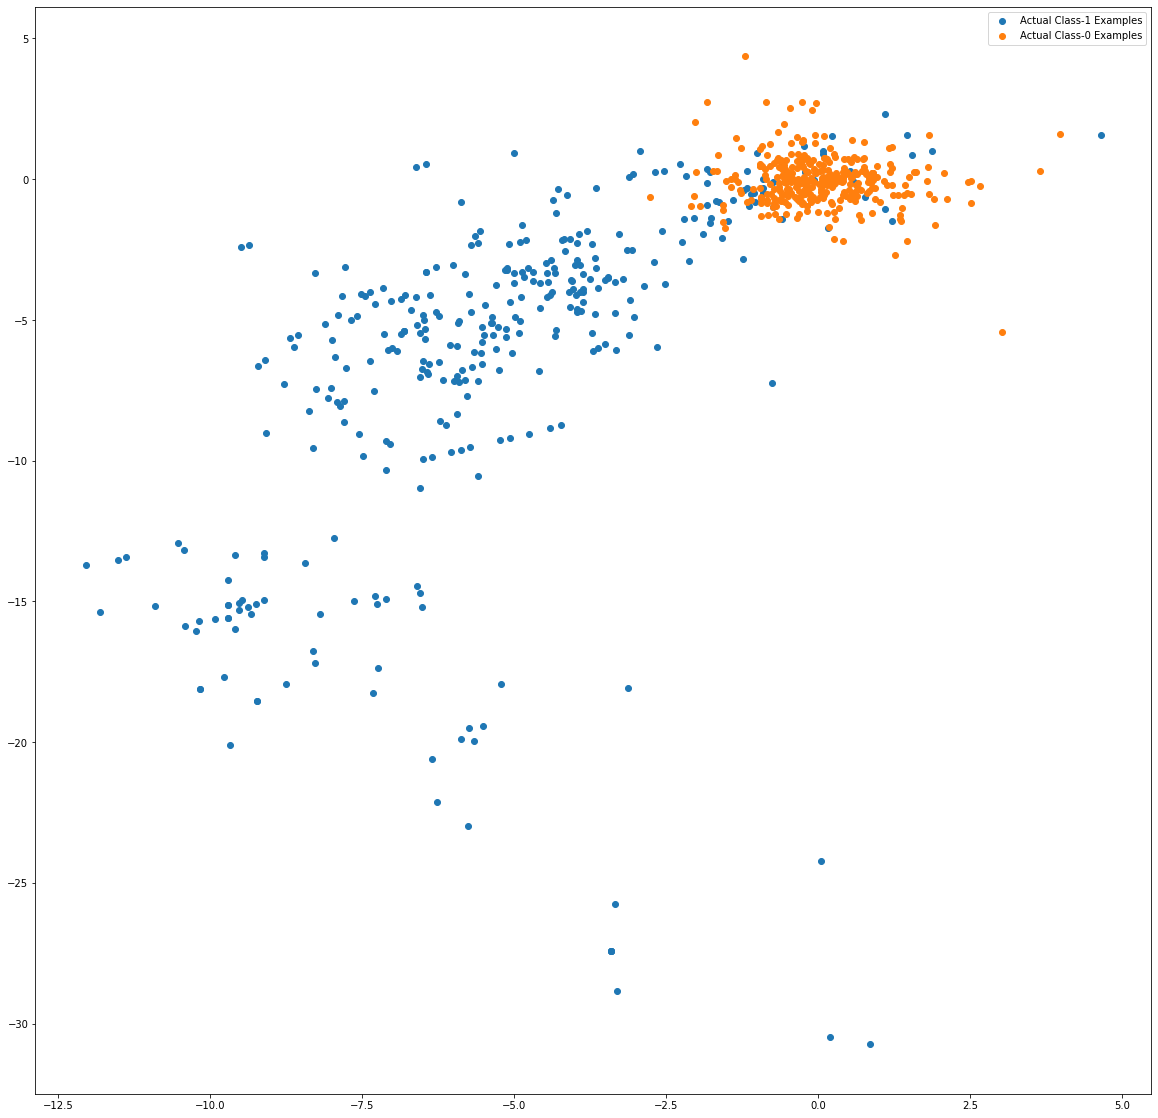

In [35]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)


top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

In [ ]:
#### Print the FPR,TPR & select the best threshold from the roc curve

In [36]:
y_prob=clf.predict_proba(X_train)

In [37]:
print('Train auc =', metrics.roc_auc_score(y_train,y_train_pred_ros))
fpr, tpr, thresholds = metrics.roc_curve(y_train,y_prob[:,1])
threshold = thresholds[np.argmax(tpr-fpr)]
print(threshold)

Train auc = 0.9999321672805109
0.9571204793317187
